In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import KFold,train_test_split,cross_val_score
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=300
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import r2_score,classification_report

In [2]:
df=pd.read_csv('Company_Data.csv')
df

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df.duplicated().sum()

0

In [45]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

### EDA of Numerical columns

In [44]:
df.describe()

Sales   CompPrice      Income  Advertising  Population     Price  \
count  400.000000  400.000000  400.000000   400.000000   400.00000  400.0000   
mean     9.166225  124.950000   69.437500     8.325000   263.27250  115.9050   
std     15.409684   16.228321   29.292383    16.591113   147.56055   23.0841   
min      0.160000   53.500000   21.000000     0.000000    10.00000   53.5000   
25%      5.457500  115.000000   43.750000     0.000000   138.50000  100.0000   
50%      7.510000  125.000000   69.000000     5.000000   269.50000  117.0000   
75%      9.335000  135.000000   91.250000    12.000000   396.50000  131.0000   
max    177.500000  177.500000  177.500000   177.500000   509.00000  177.5000   

              Age   Education  
count  400.000000  400.000000  
mean    54.342500   15.450000  
std     19.203767   14.706655  
min     25.000000   10.000000  
25%     40.000000   12.000000  
50%     55.000000   14.000000  
75%     66.000000   16.000000  
max    177.500000  177.500000

<AxesSubplot:>

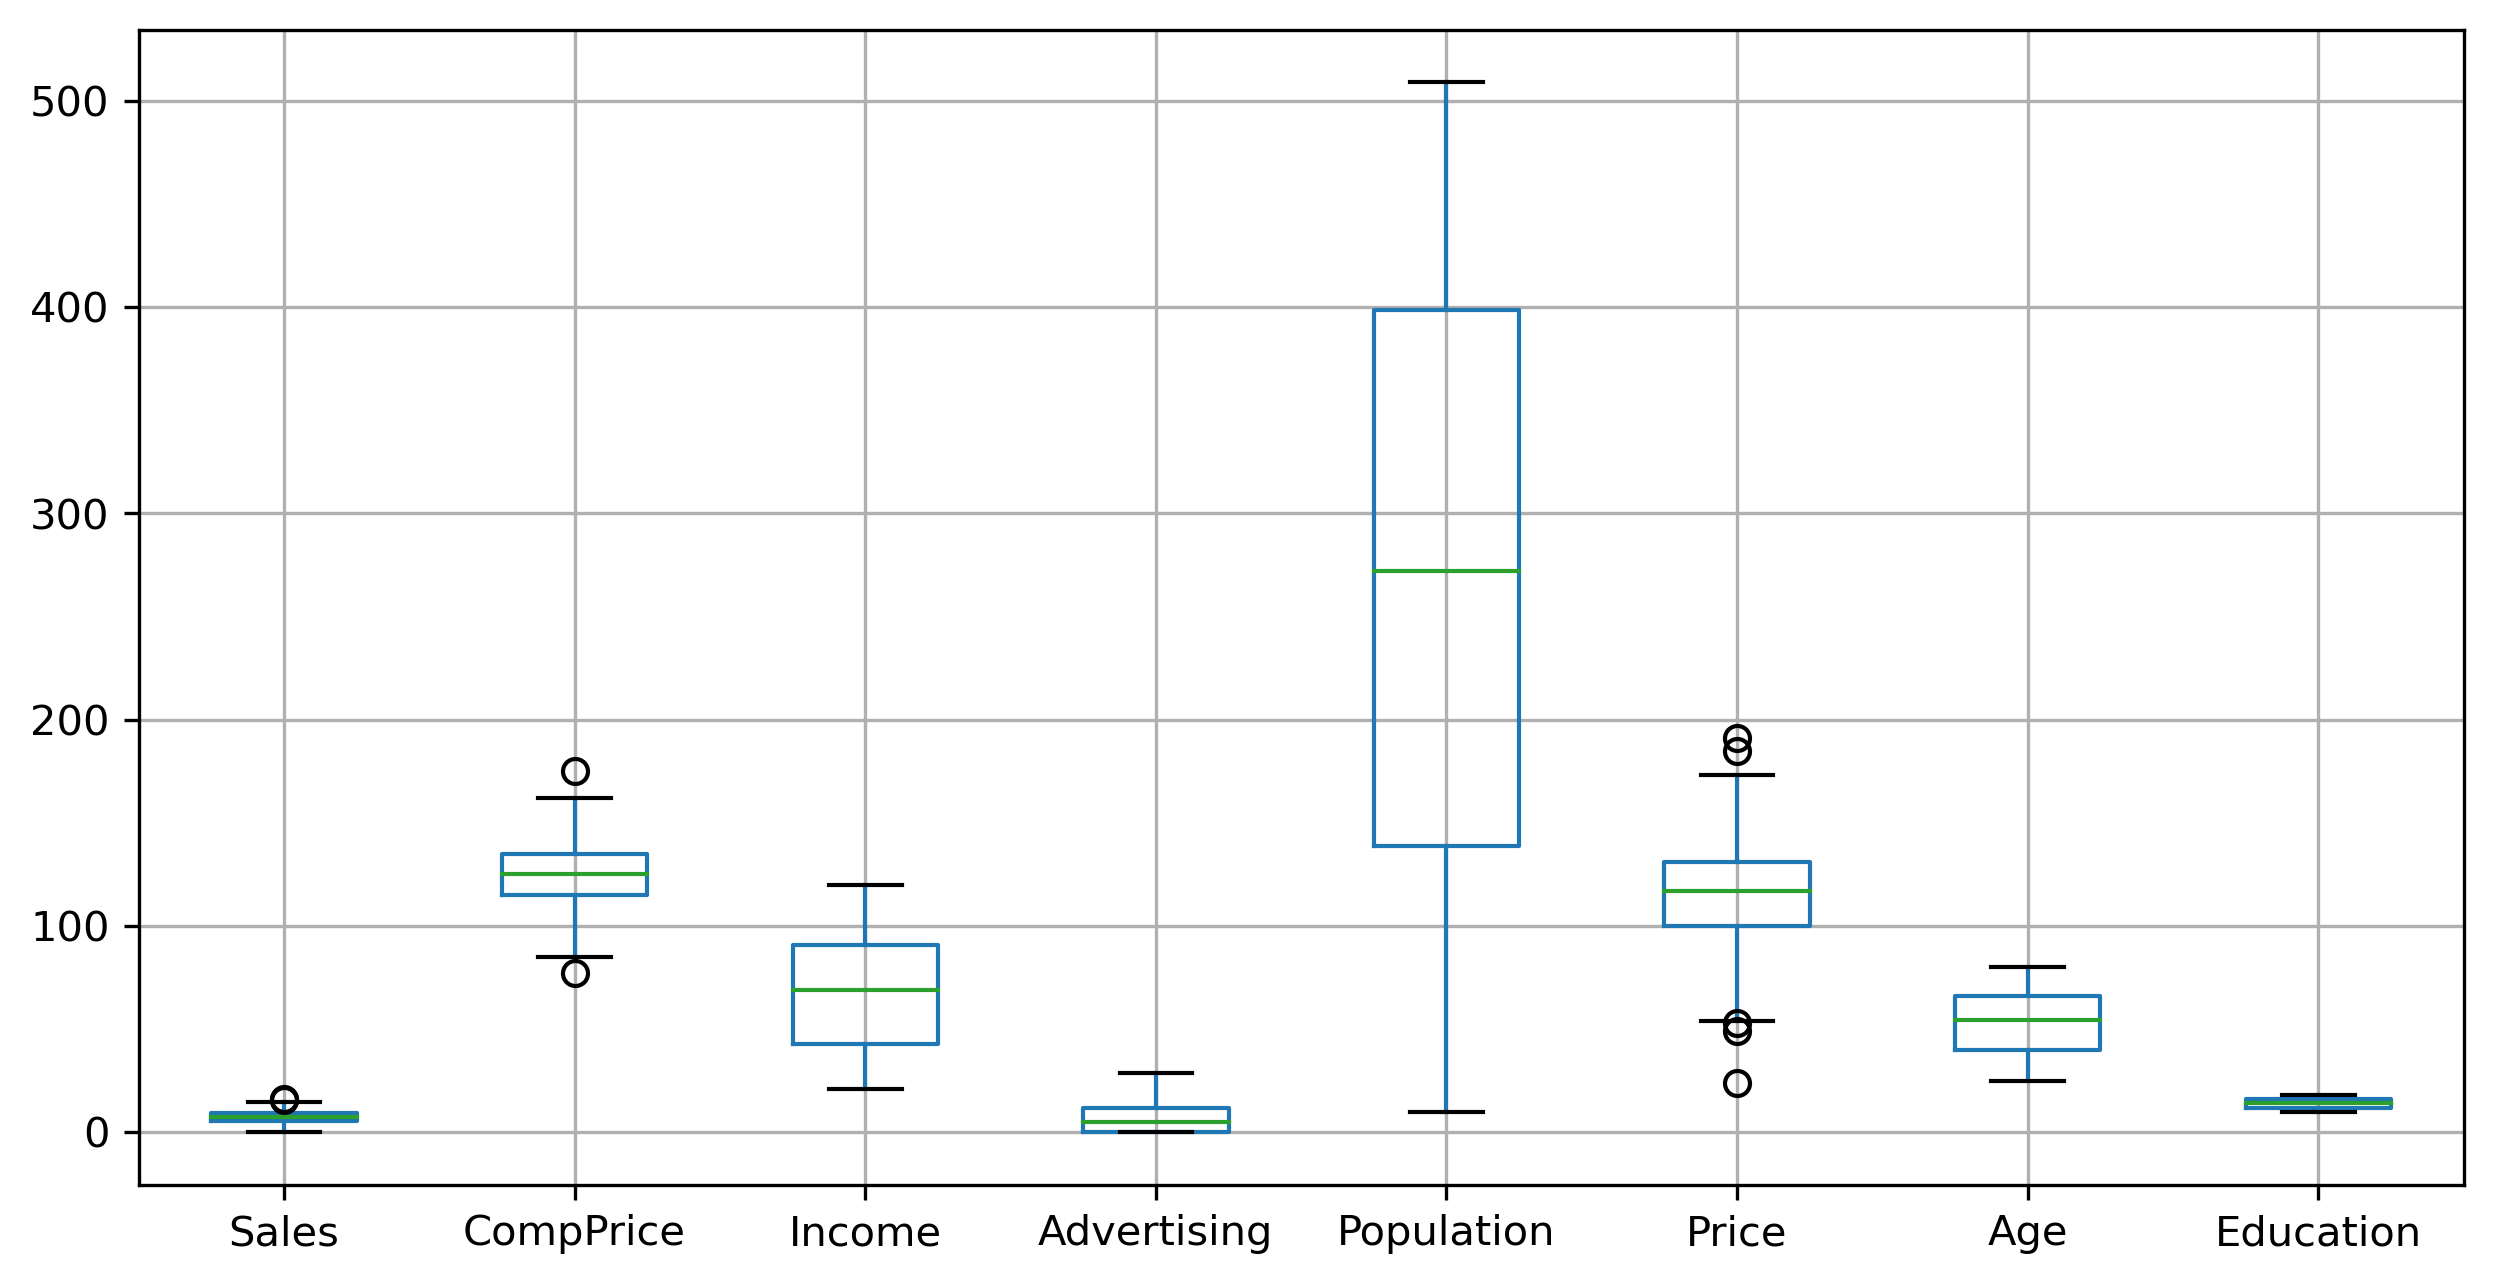

In [6]:
df.boxplot()

<AxesSubplot:xlabel='CompPrice'>

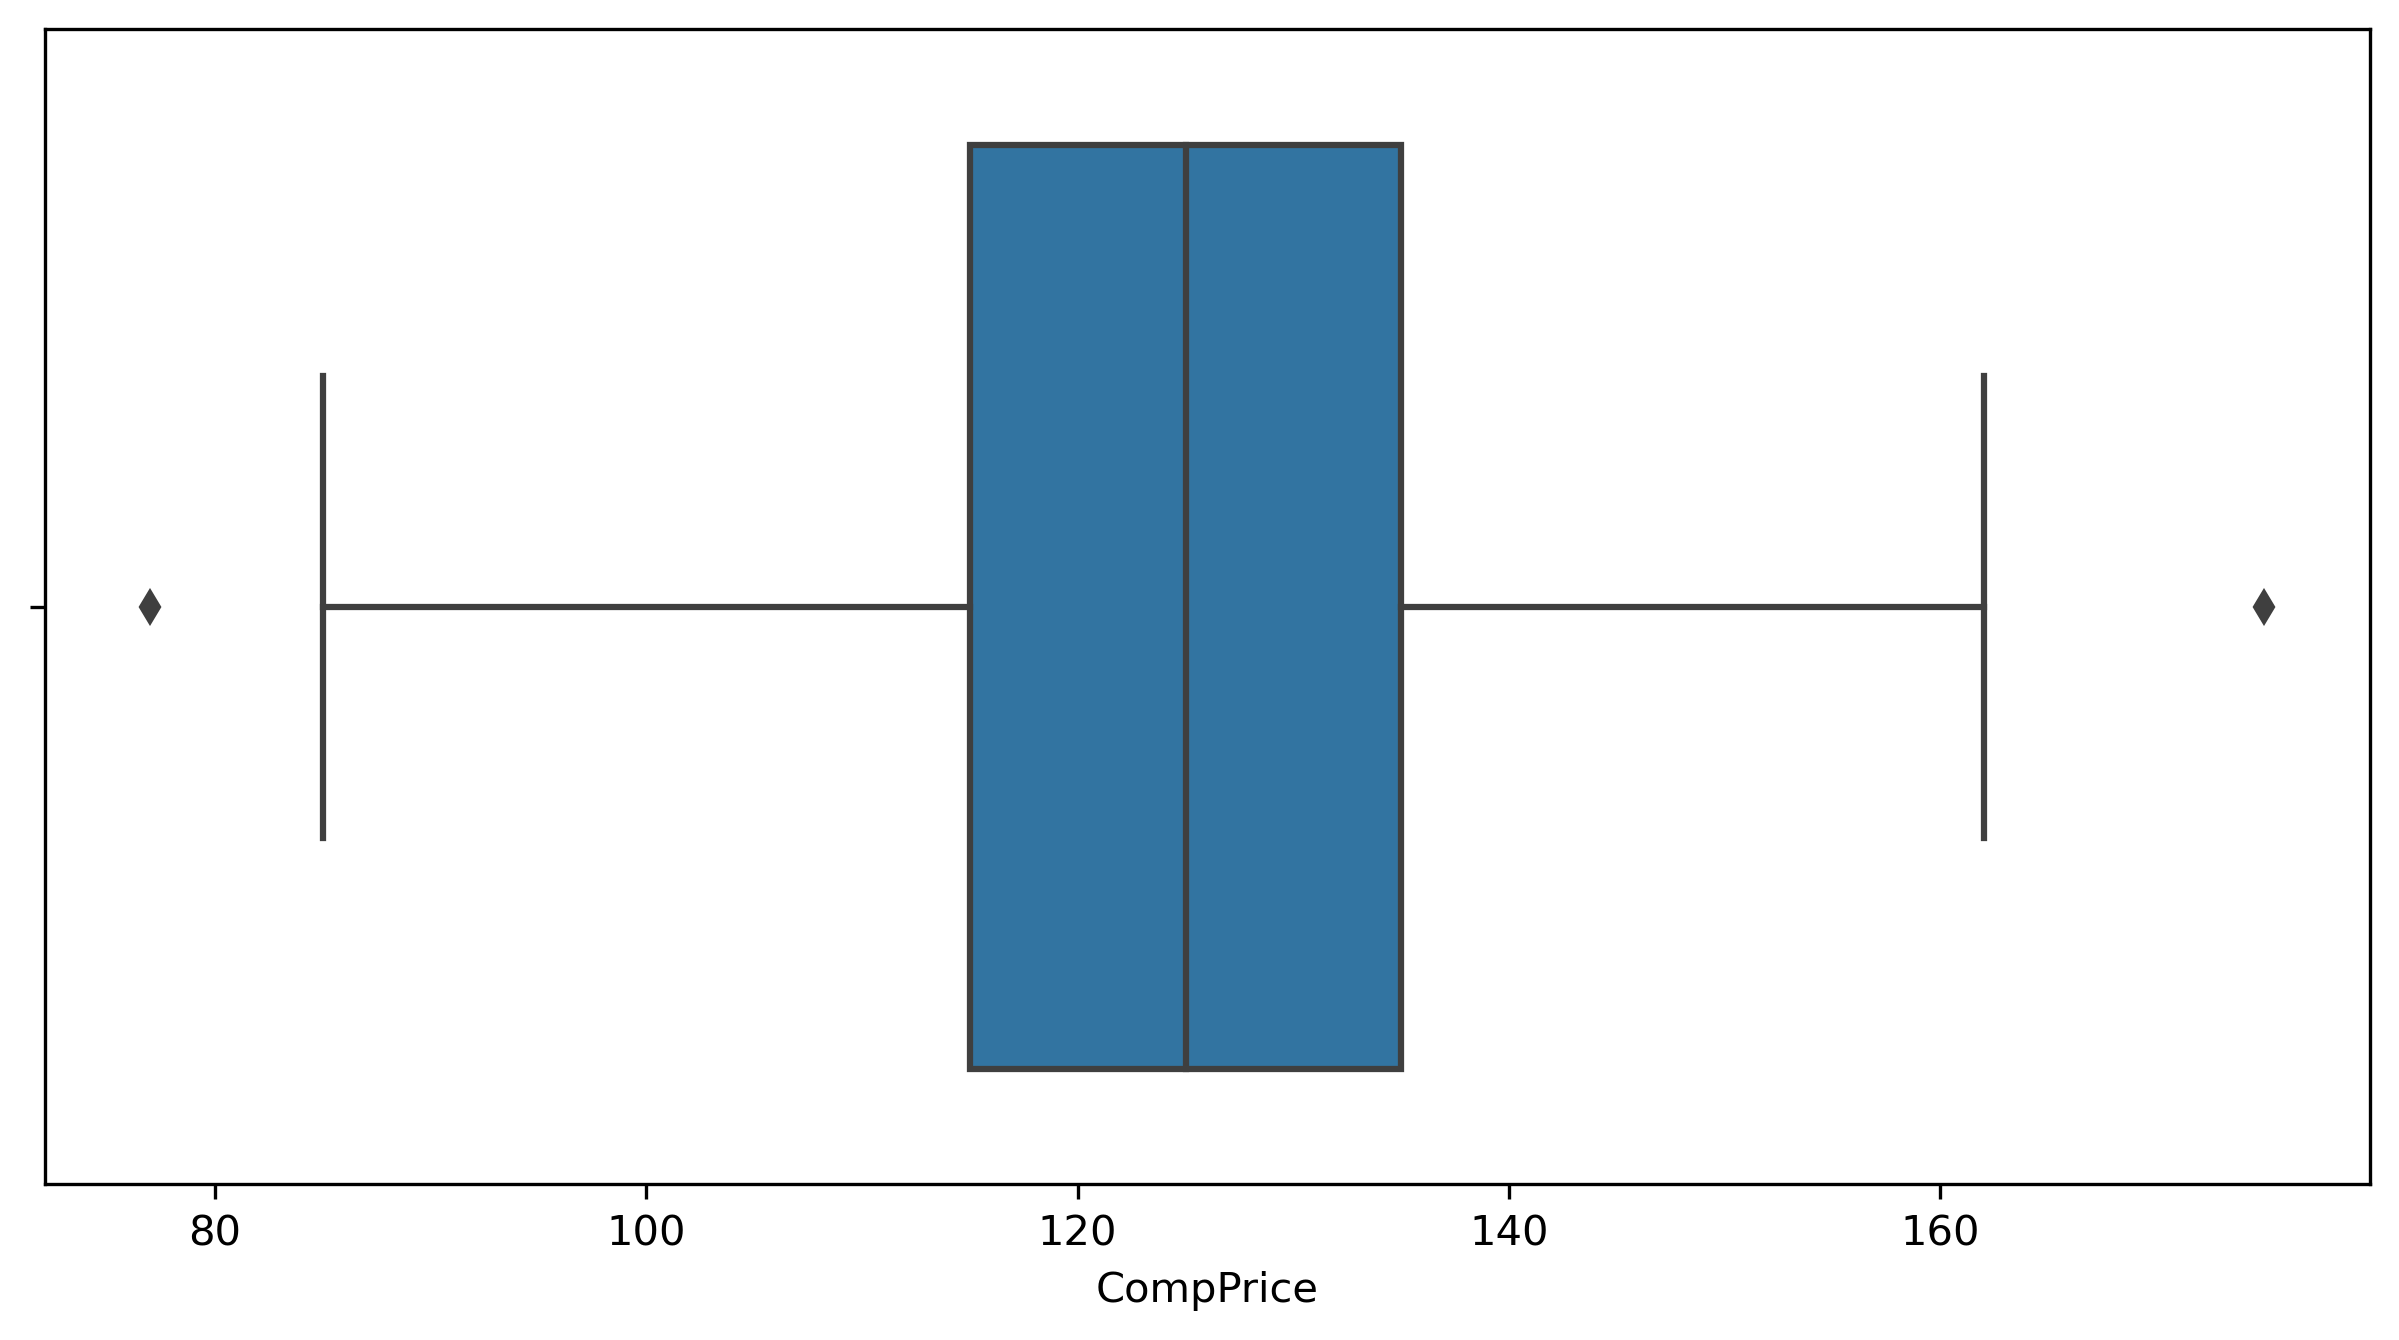

In [8]:
sns.boxplot(df['CompPrice'])

<AxesSubplot:xlabel='Price'>

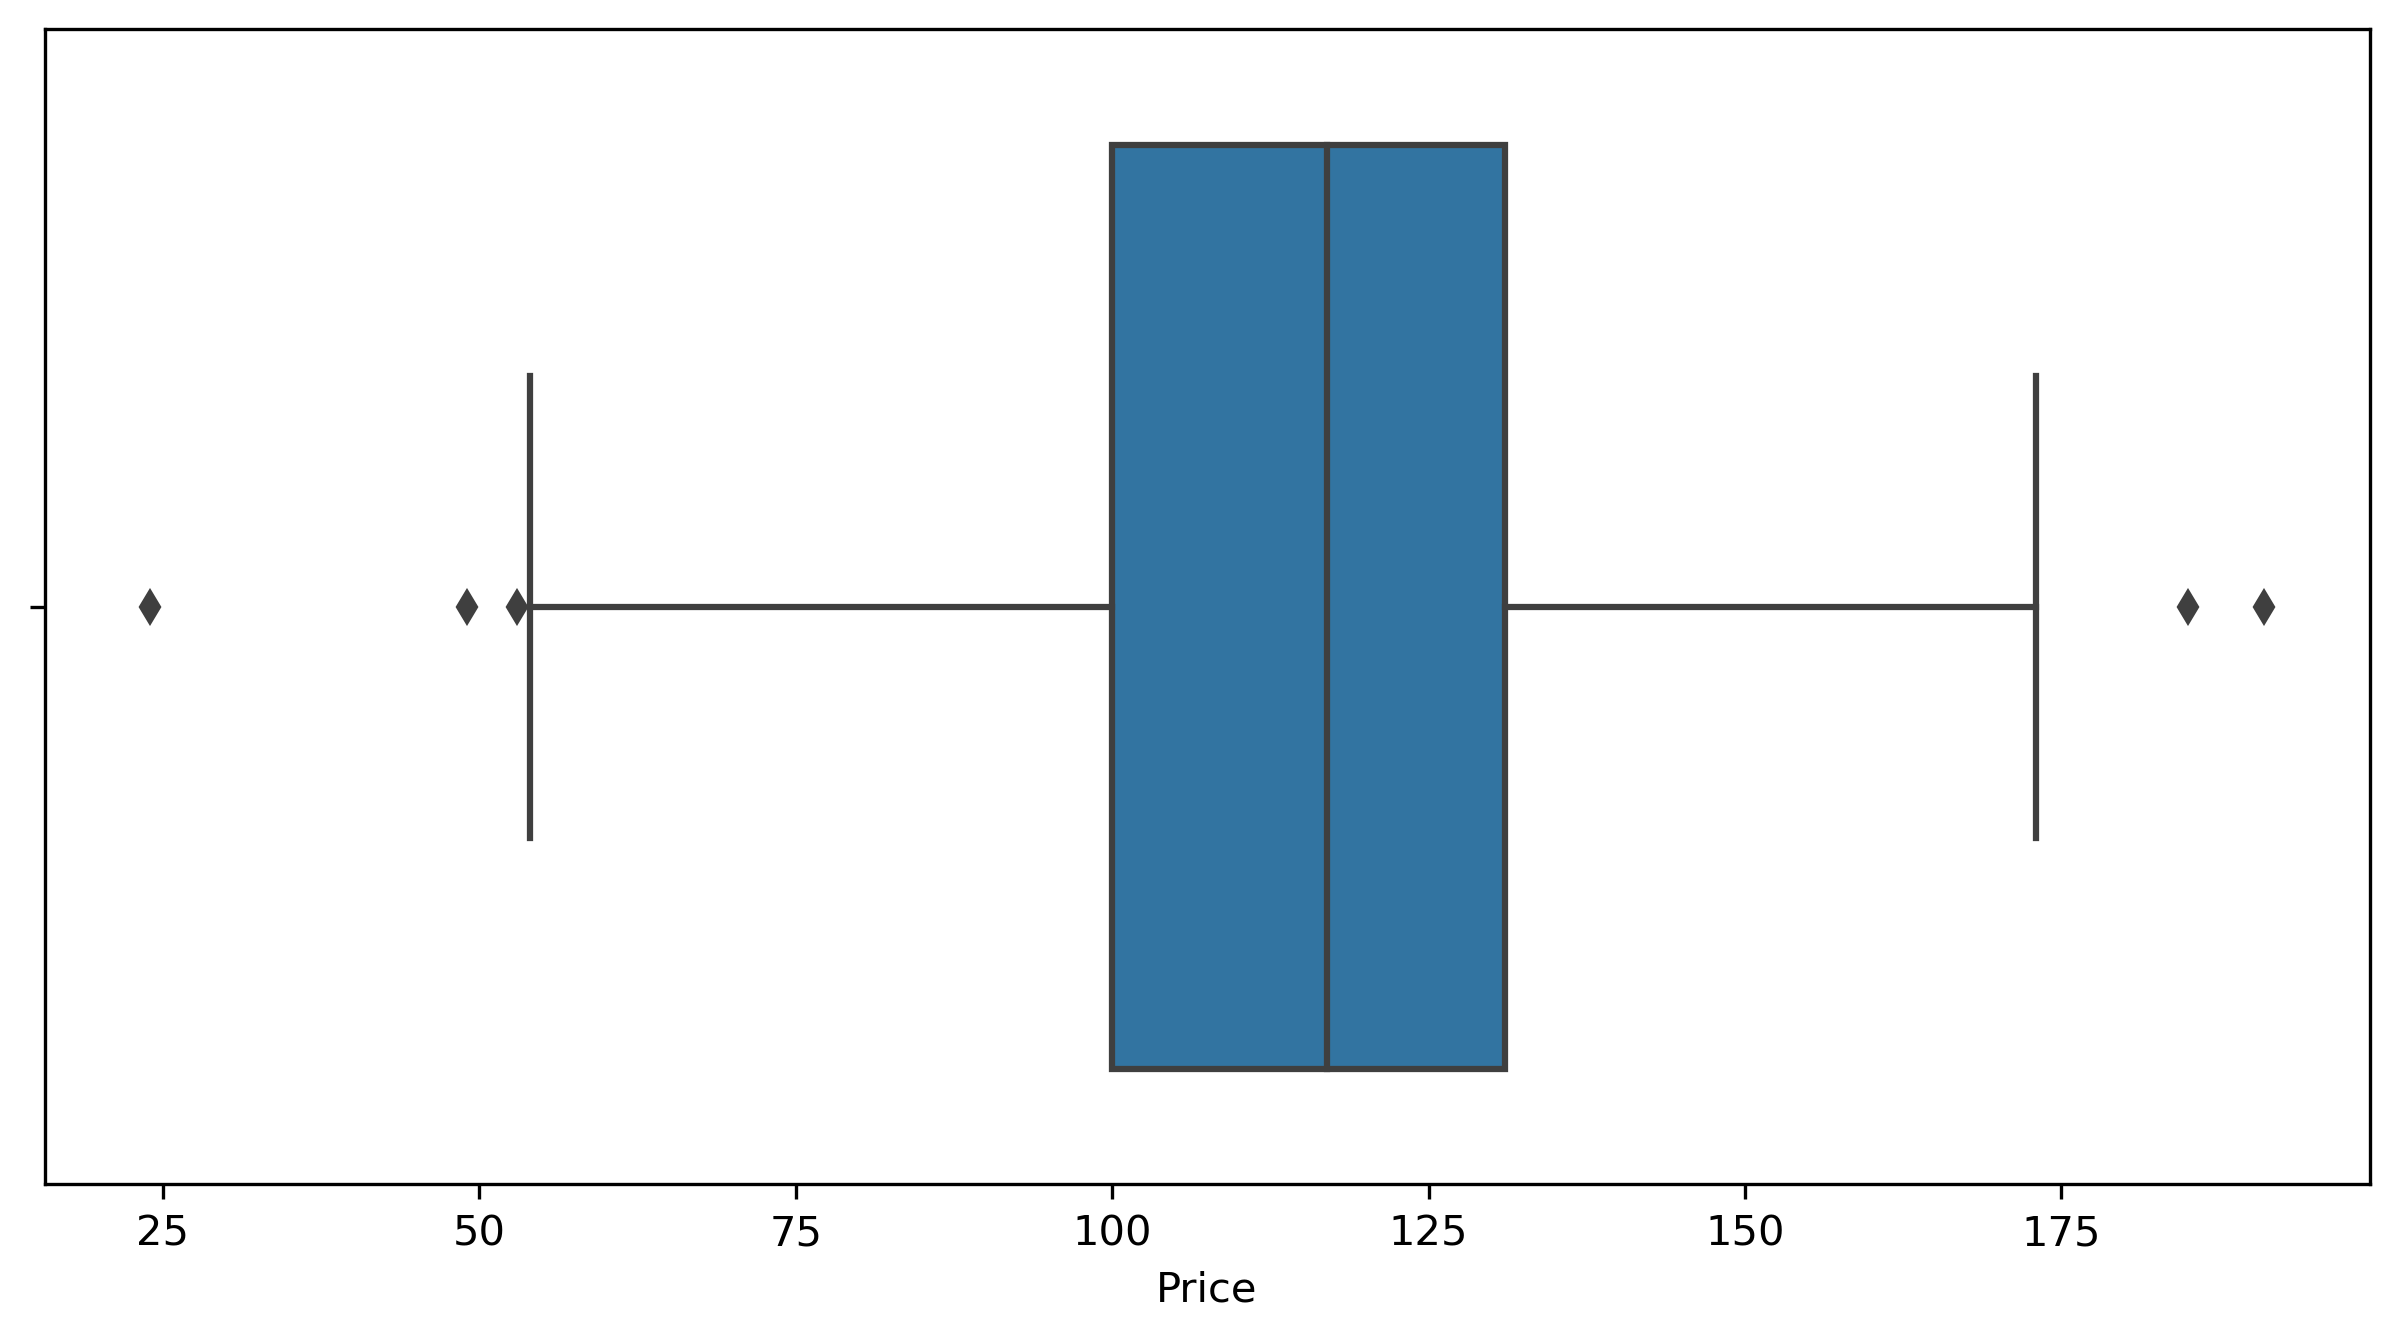

In [12]:
sns.boxplot(df['Price'])

In [14]:
## Outliers Detection

def outliers(df,col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    
    iqr=q3-q1
    
    upper=q3+(1.5)*iqr
    lower=q1-(1.5)*iqr
    
    return upper,lower


In [15]:
df.head(2)

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes

In [16]:
outliers(df,'CompPrice')

(165.0, 85.0)

In [17]:
df[df['CompPrice']>165]=165

In [18]:
df[df['CompPrice']<85]=85

<AxesSubplot:xlabel='CompPrice'>

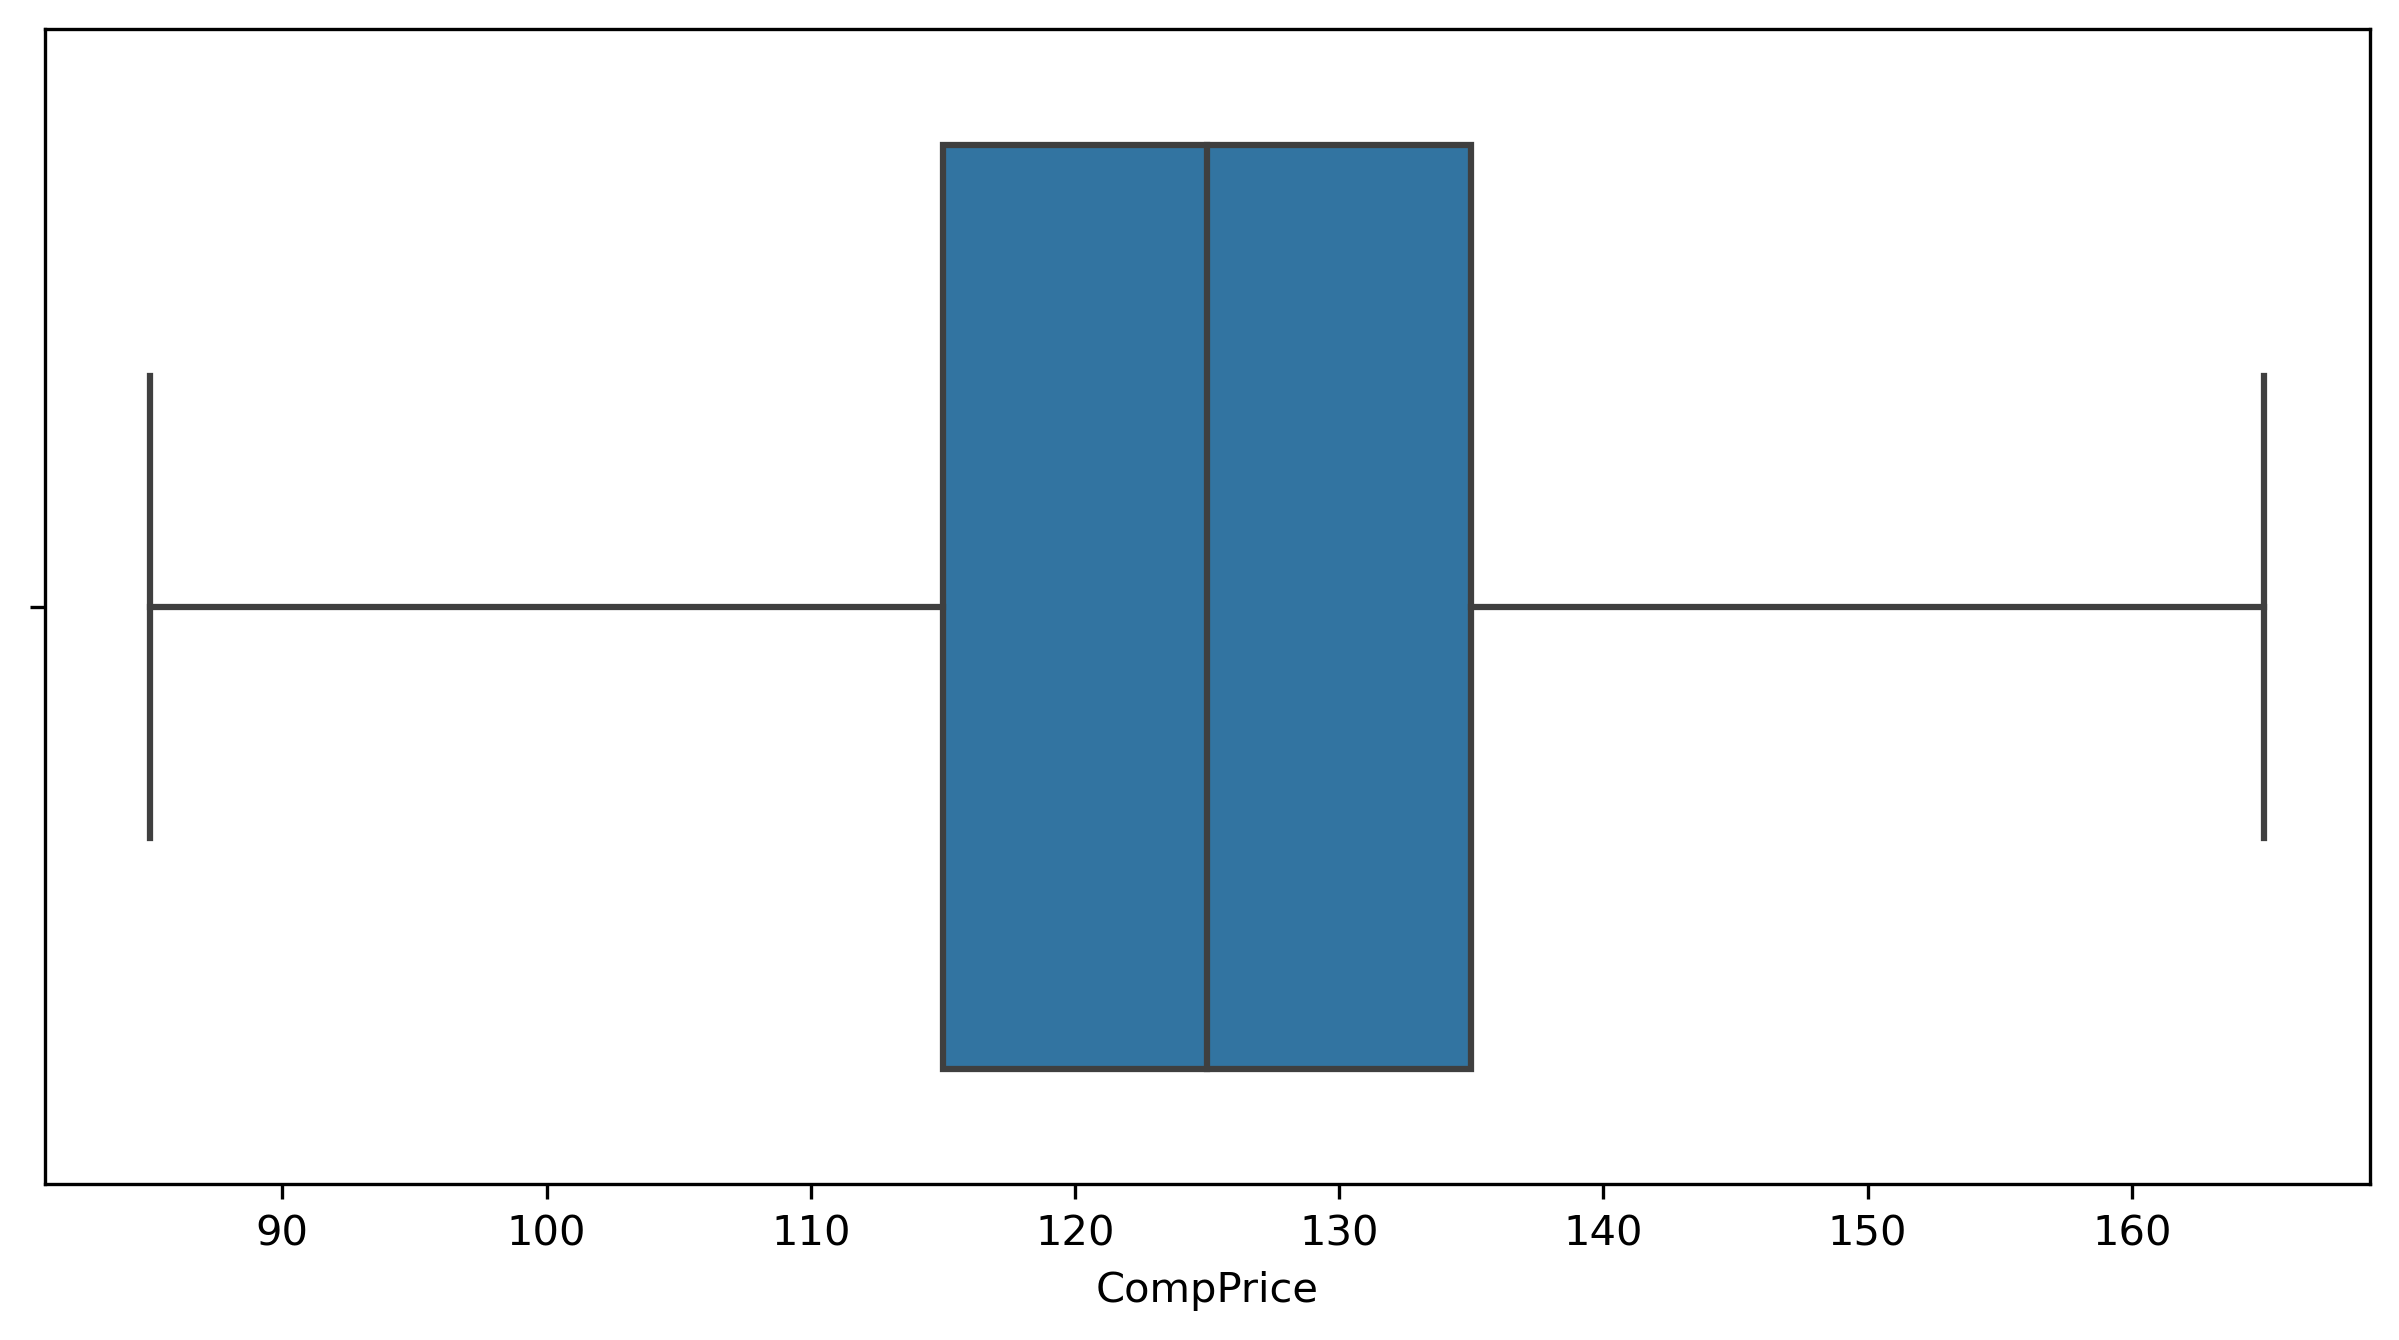

In [19]:
sns.boxplot(df['CompPrice'])

In [20]:
outliers(df,'Price')

(177.5, 53.5)

In [21]:
df[df['Price']>177.5]=177.5

In [22]:
df[df['Price']<53.5]=53.5

<AxesSubplot:xlabel='Price'>

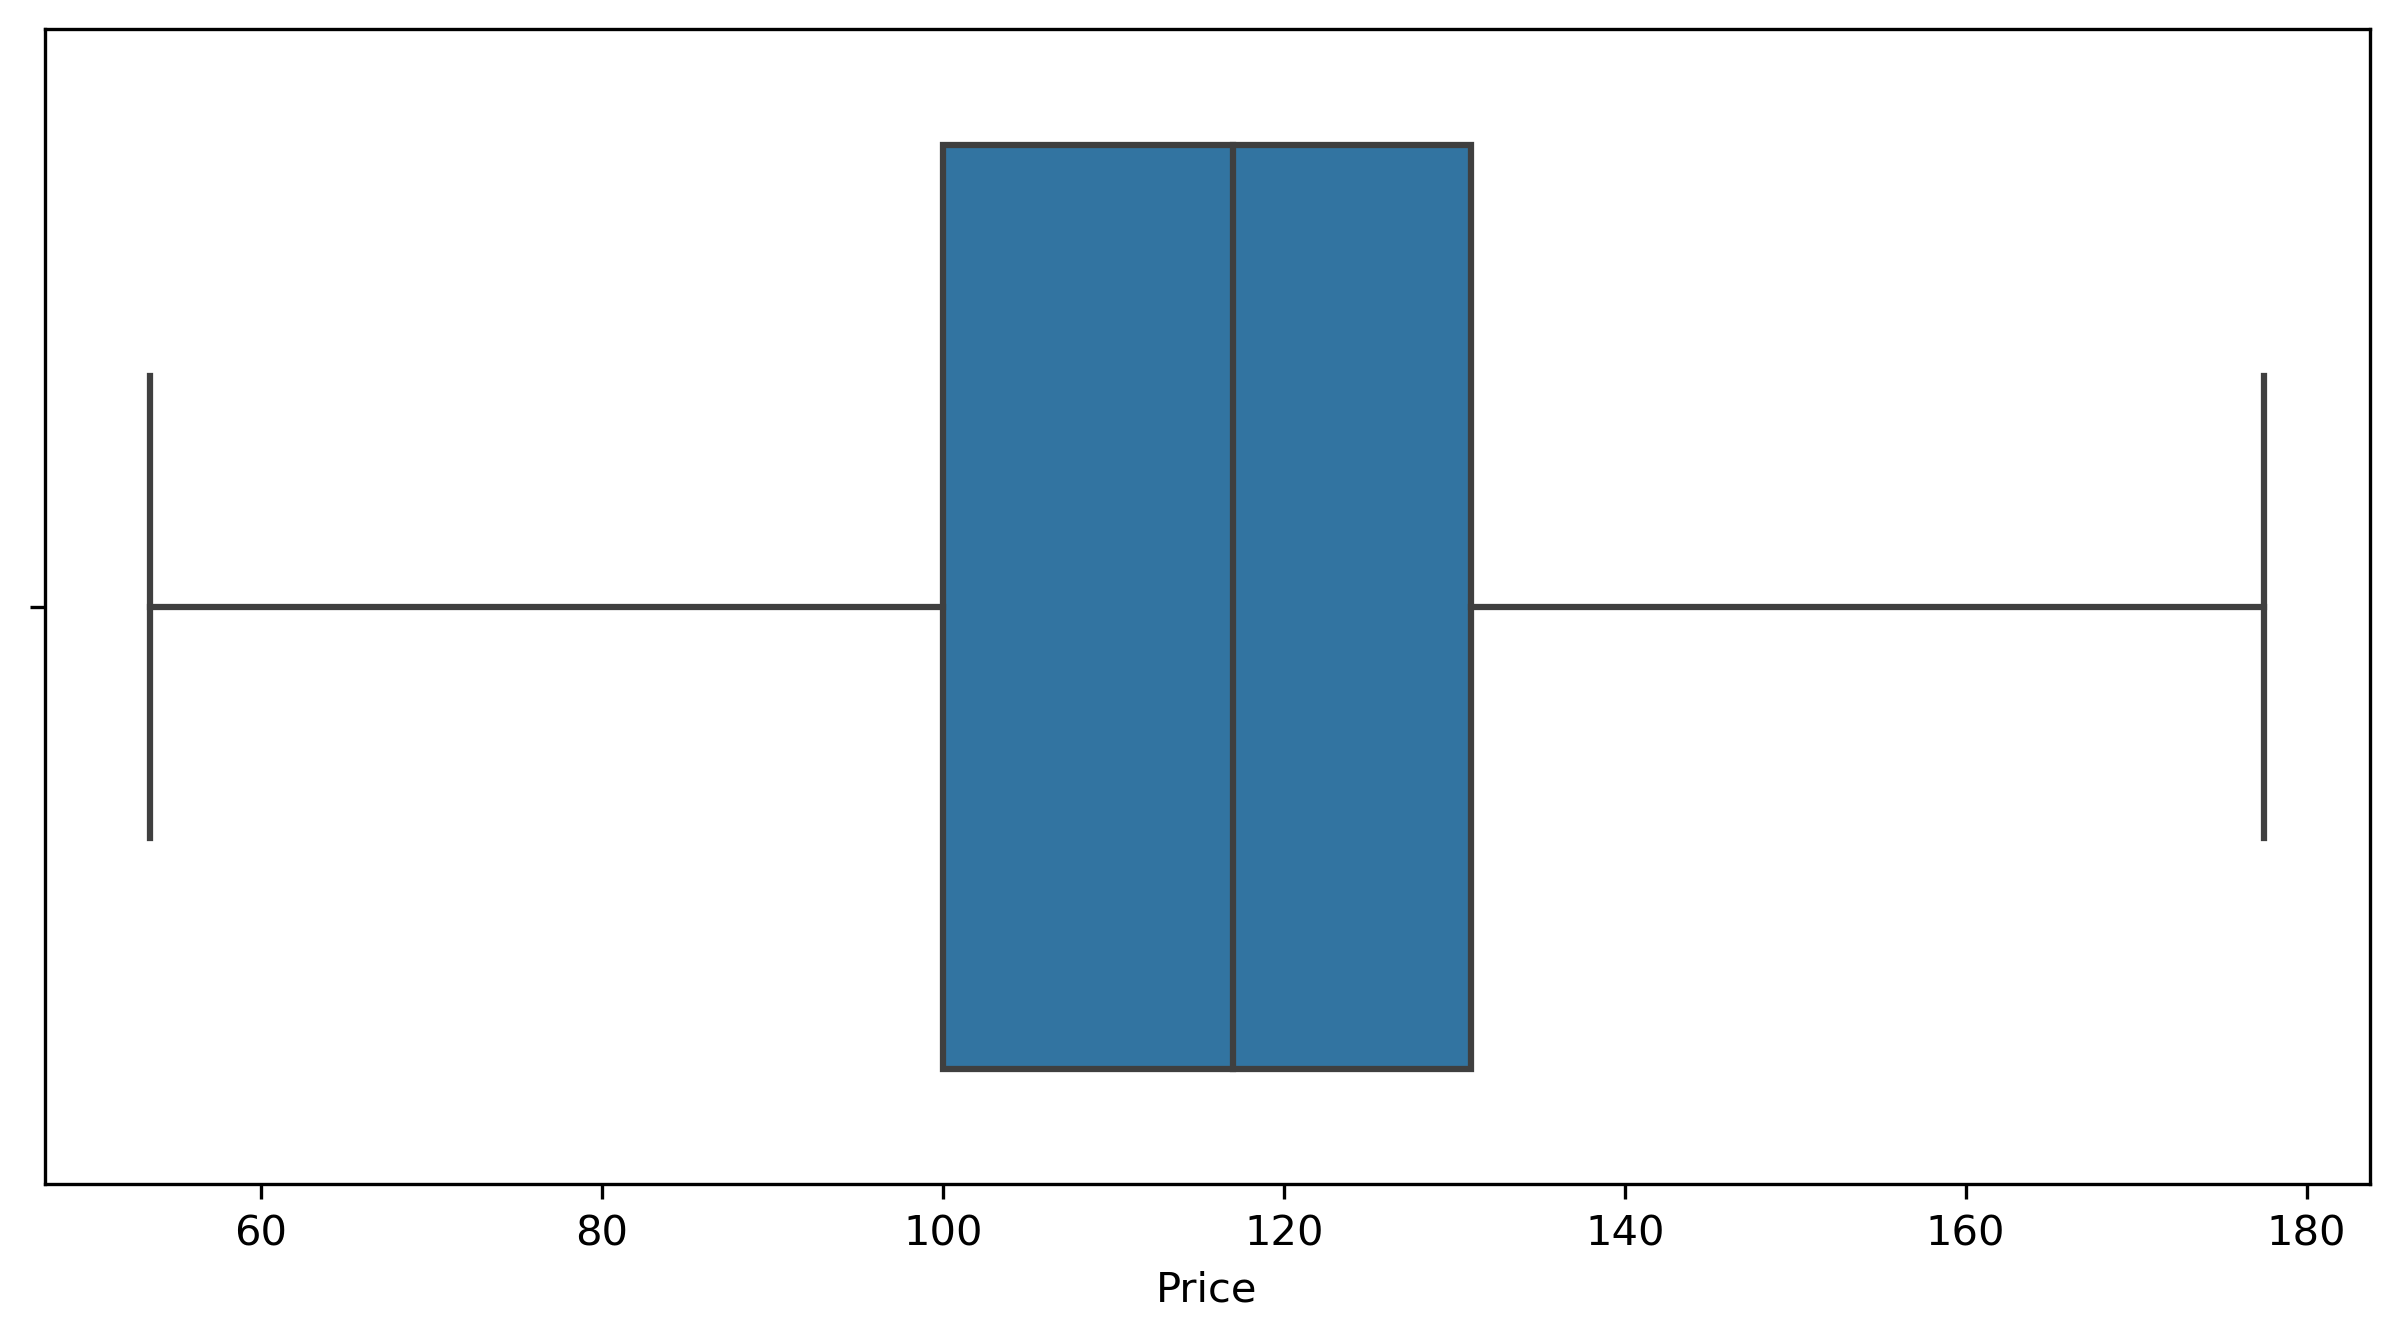

In [23]:
sns.boxplot(df['Price'])

##### Checking relationship with target coulmn

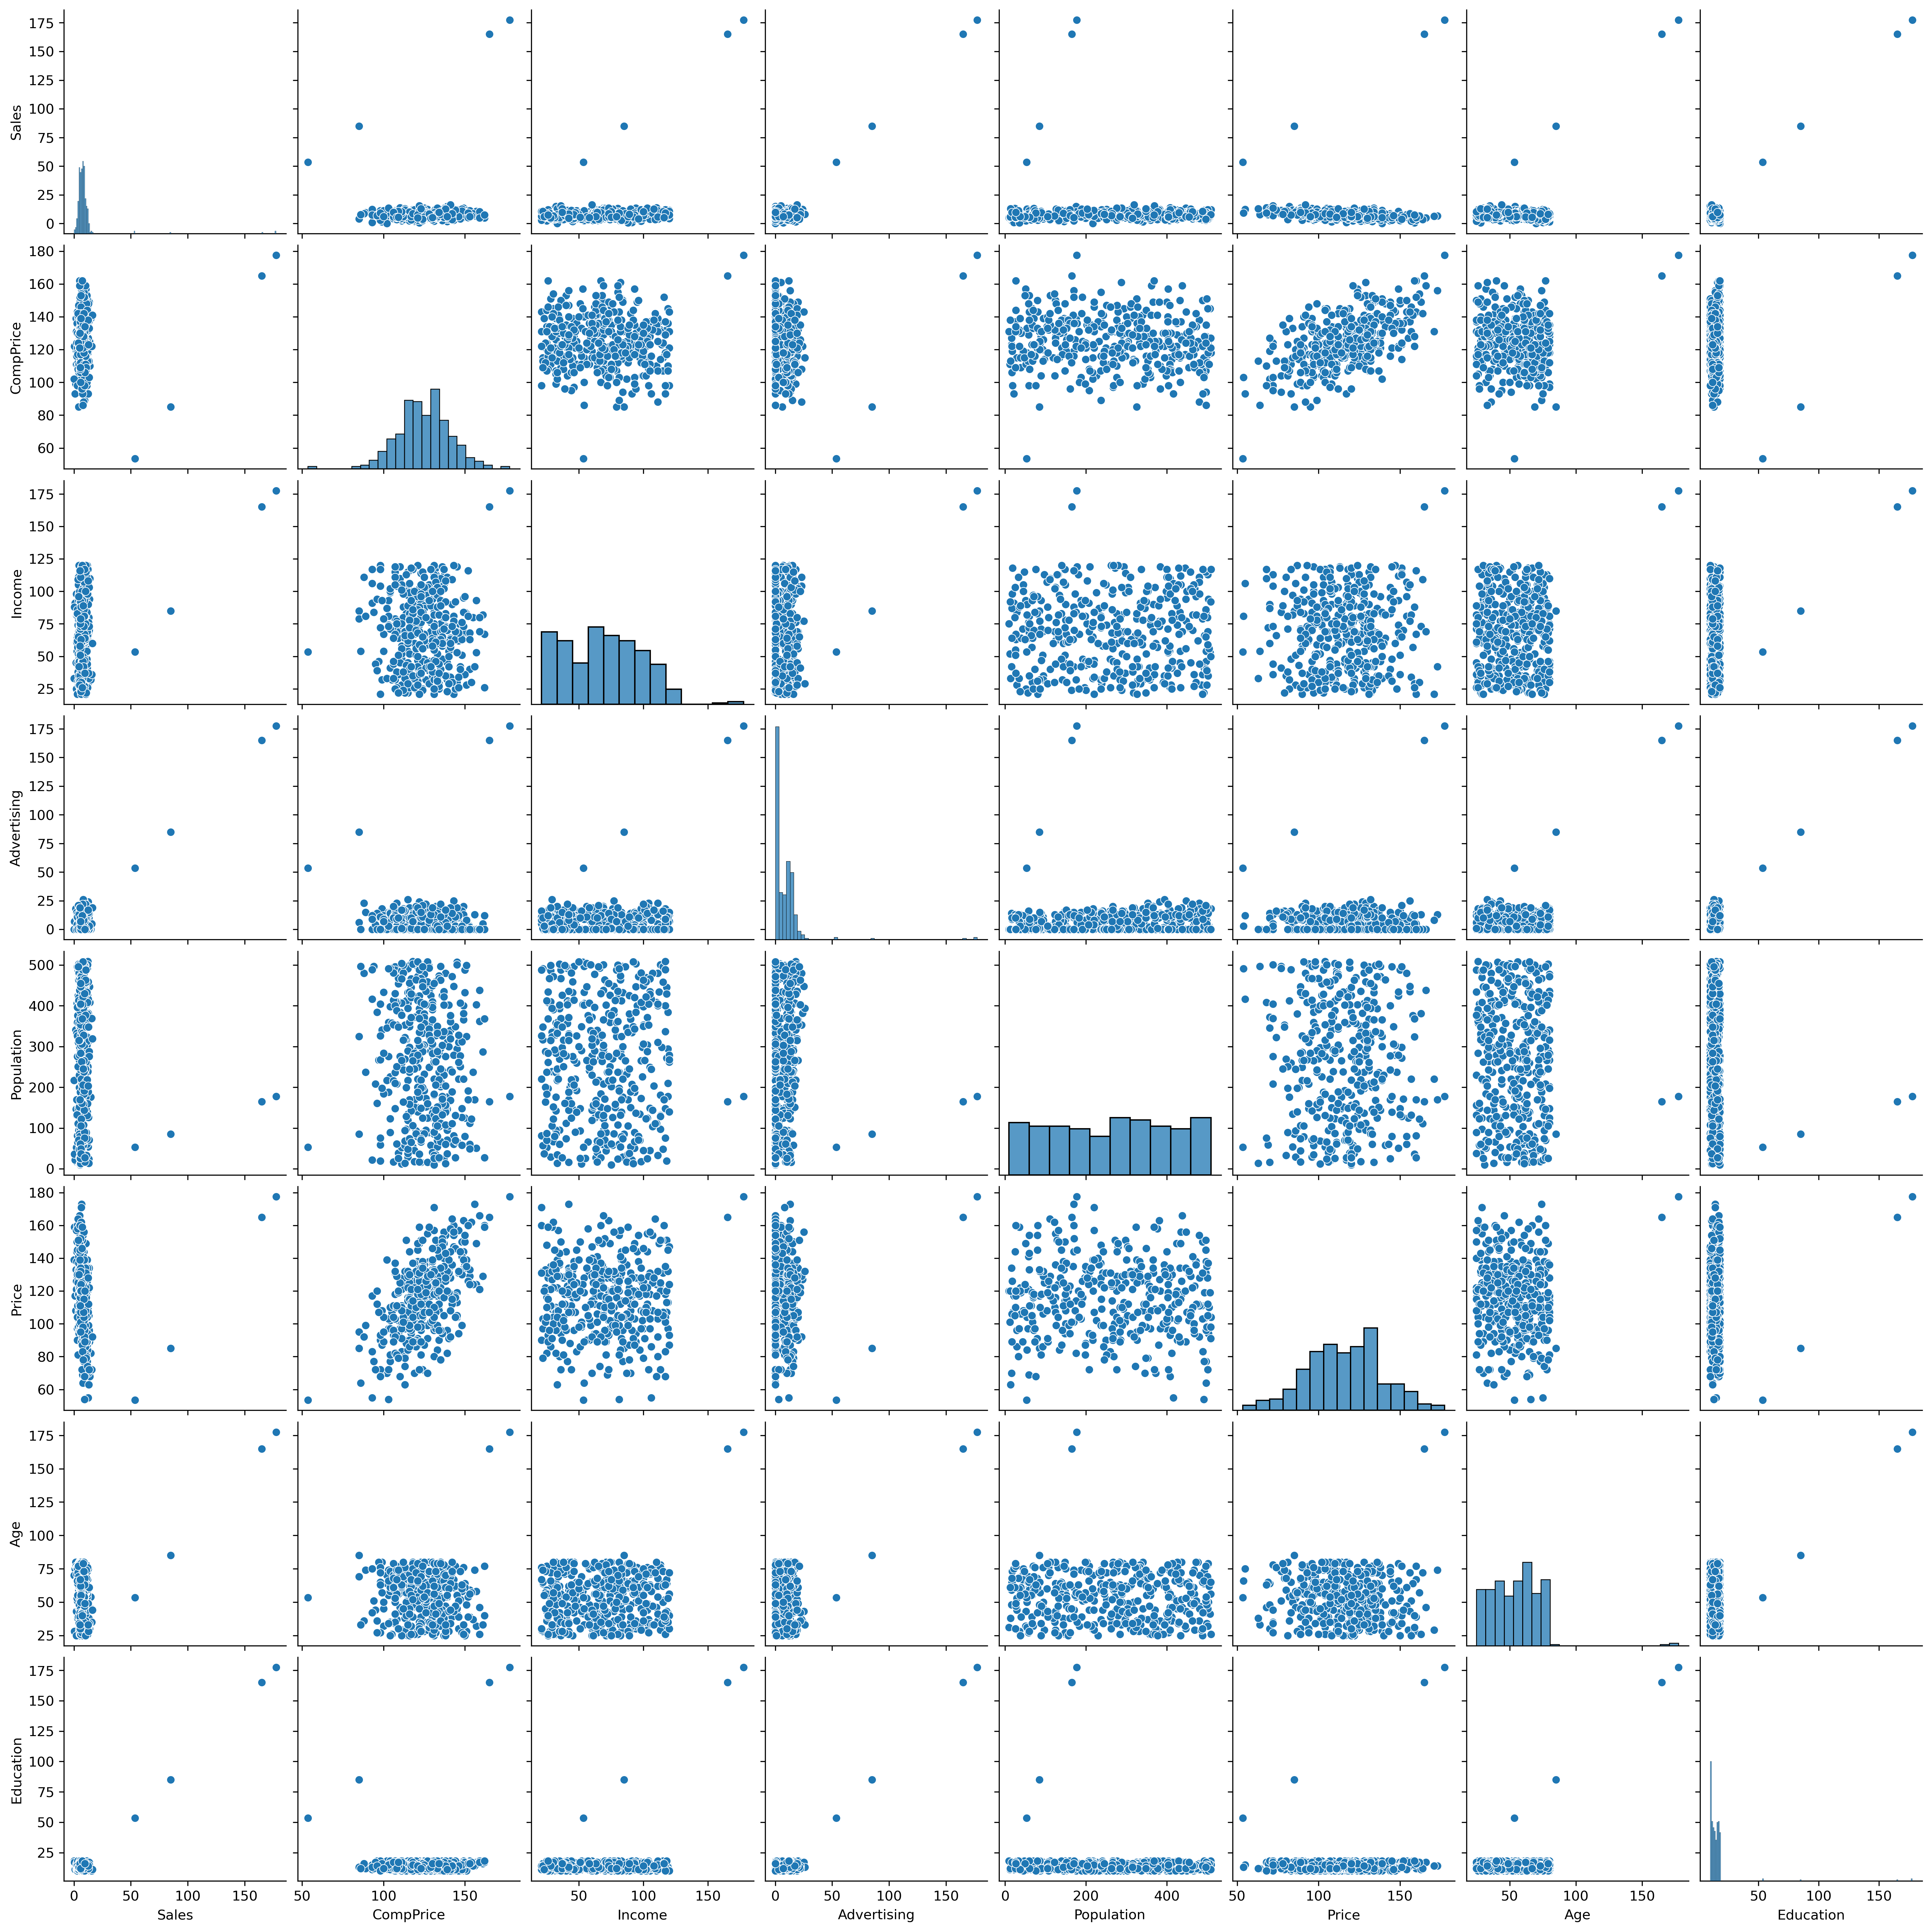

In [46]:
sns.pairplot(df)

<AxesSubplot:>

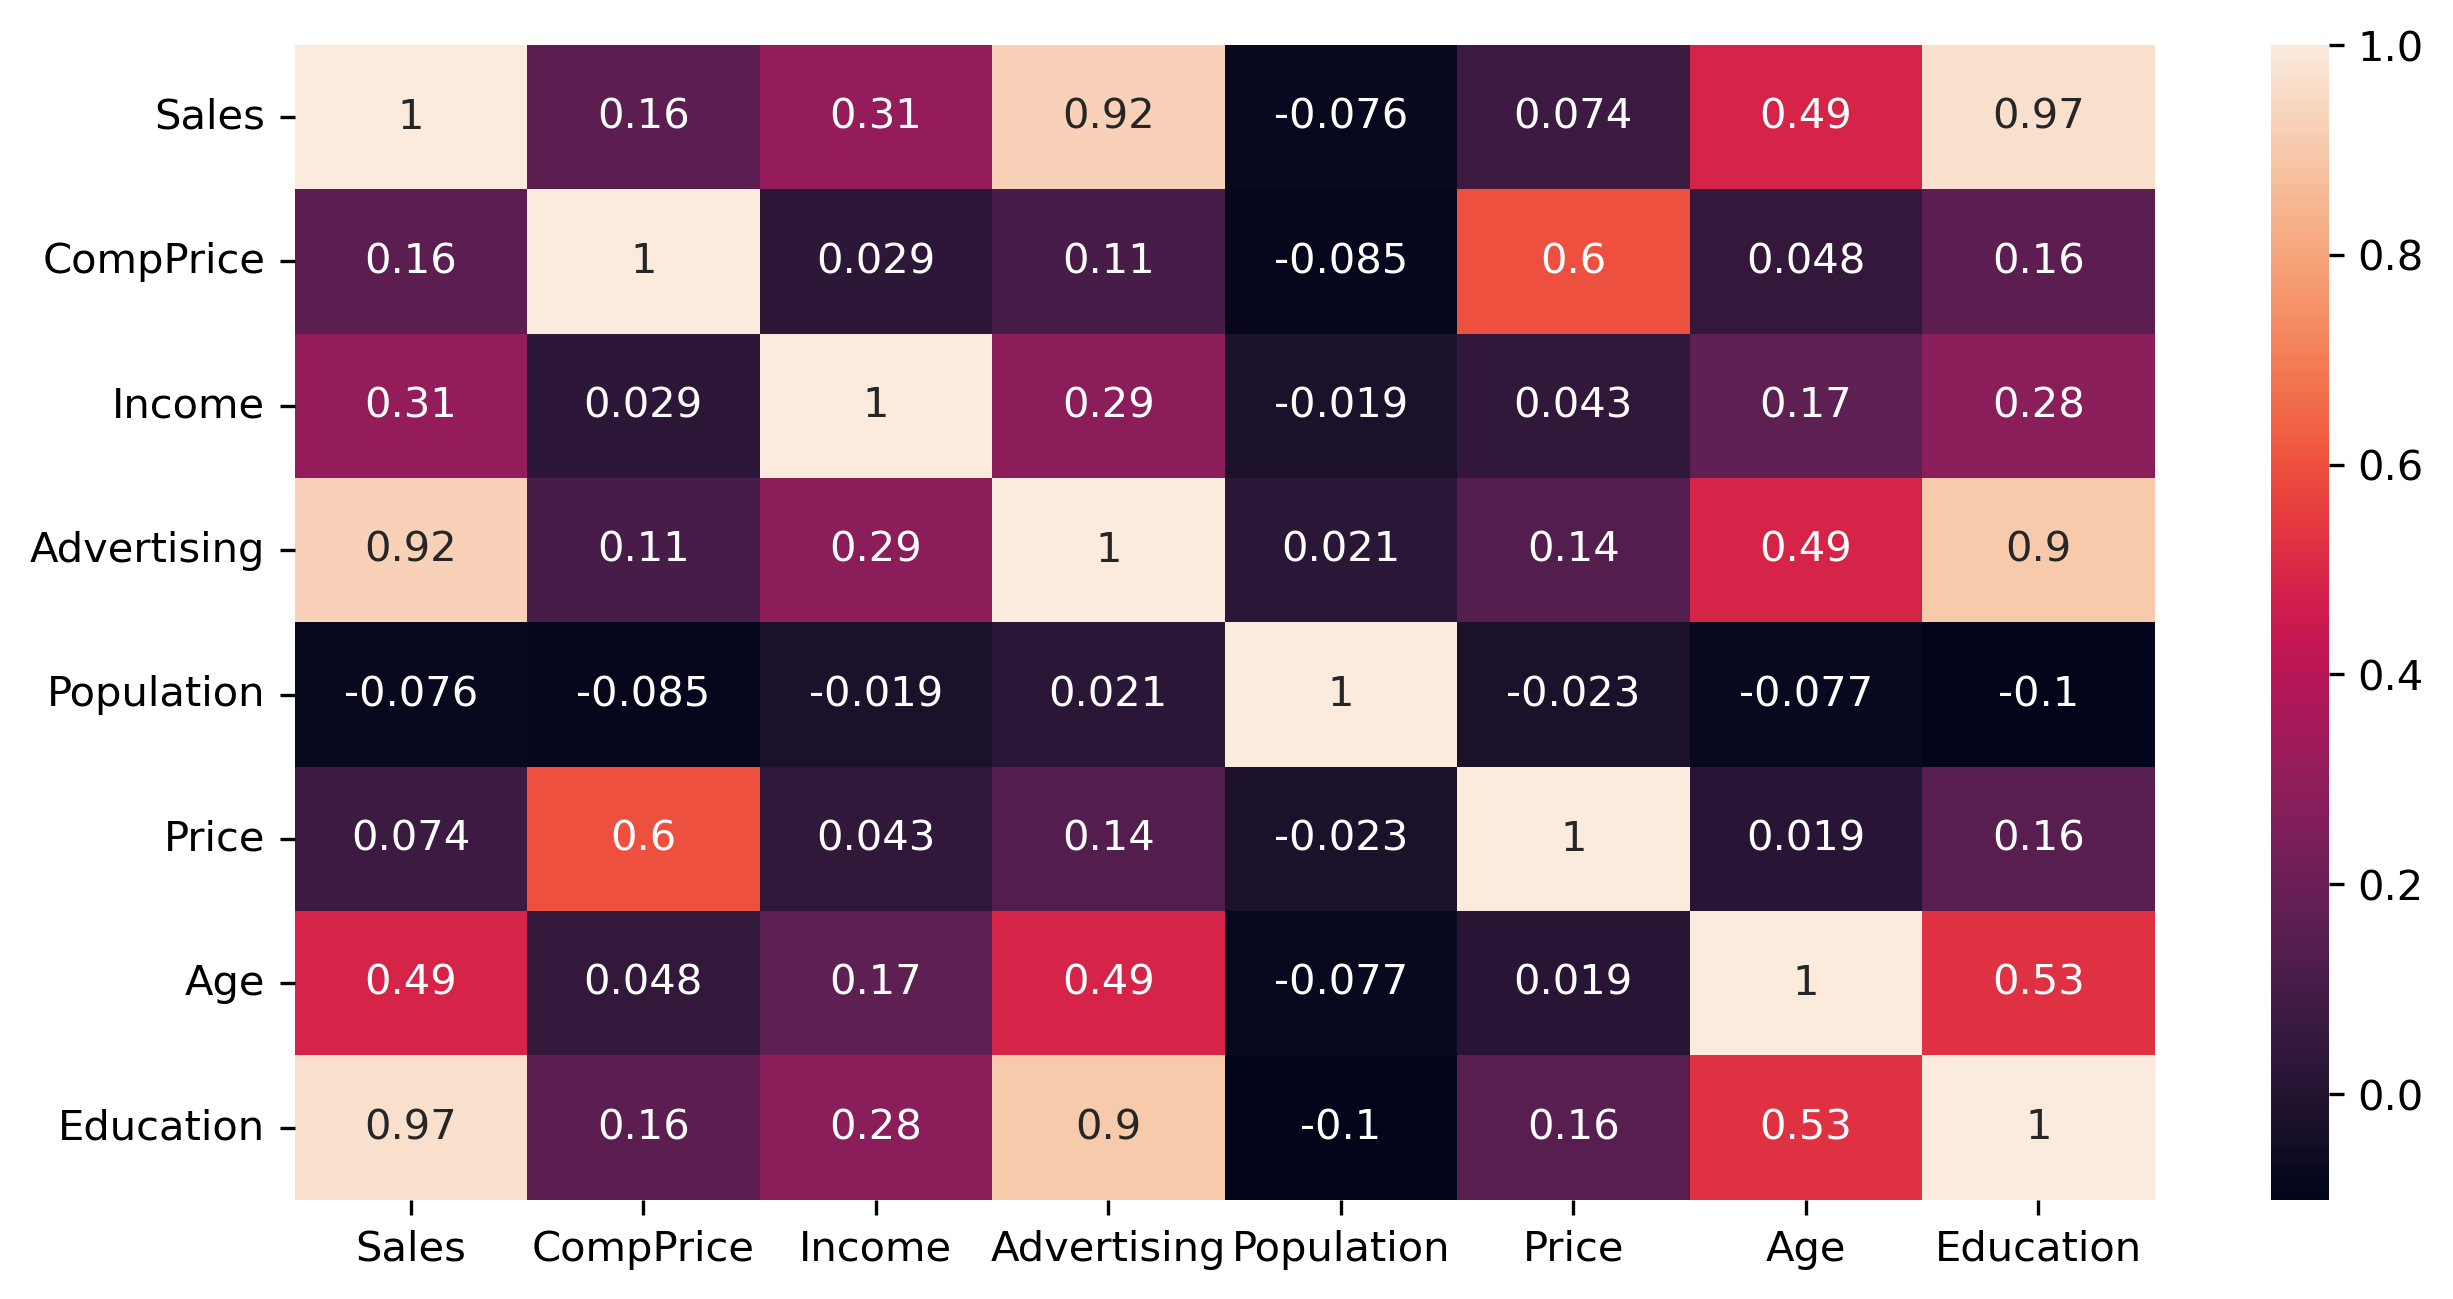

In [48]:
sns.heatmap(df.corr(),annot=True)

### EDA of categorical columns

In [24]:
## Checking unique values

df['ShelveLoc'].unique()

array(['Bad', 'Good', 'Medium', 85, 53.5, 177.5, 165], dtype=object)

In [25]:
df['ShelveLoc'].mode()

0    Medium
Name: ShelveLoc, dtype: object

In [28]:
df['ShelveLoc']=df['ShelveLoc'].replace(85,'Medium')
df['ShelveLoc']=df['ShelveLoc'].replace(53.5,'Medium')
df['ShelveLoc']=df['ShelveLoc'].replace(177.5,'Medium')
df['ShelveLoc']=df['ShelveLoc'].replace(165,'Medium')

In [29]:
df['ShelveLoc'].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [30]:
df['Urban'].unique()

array(['Yes', 'No', 85, 53.5, 177.5, 165], dtype=object)

In [ ]:
df['Urban'].mode()

In [42]:
df['Urban']=df['Urban'].replace(85,'Yes')
df['Urban']=df['Urban'].replace(53.5,'Yes')
df['Urban']=df['Urban'].replace(177.5,'Yes')
df['Urban']=df['Urban'].replace(165,'Yes')

In [43]:
df['Urban'].unique()

array(['Yes', 'No'], dtype=object)

In [37]:
df['US'].unique()

array(['Yes', 'No', 85, 53.5, 177.5, 165], dtype=object)

In [34]:
df['US'].mode()

0    Yes
Name: US, dtype: object

In [40]:
df['US']=df['US'].replace(85,'Yes')
df['US']=df['US'].replace(53.5,'Yes')
df['US']=df['US'].replace(177.5,'Yes')
df['US']=df['US'].replace(165,'Yes')

In [41]:
df['US'].unique()

array(['Yes', 'No'], dtype=object)

#### Conversion of Sales column into categorical

In [51]:
sales_group=pd.cut(df.Sales,bins=[0,5,10,200],labels=['Low','Modarate','High'])


In [52]:
df['sales_group']=sales_group

In [53]:
df

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc   Age  \
0     9.50      138.0    73.0         11.0       276.0  120.0       Bad  42.0   
1    11.22      111.0    48.0         16.0       260.0   83.0      Good  65.0   
2    10.06      113.0    35.0         10.0       269.0   80.0    Medium  59.0   
3     7.40      117.0   100.0          4.0       466.0   97.0    Medium  55.0   
4     4.15      141.0    64.0          3.0       340.0  128.0       Bad  38.0   
..     ...        ...     ...          ...         ...    ...       ...   ...   
395  12.57      138.0   108.0         17.0       203.0  128.0      Good  33.0   
396   6.14      139.0    23.0          3.0        37.0  120.0    Medium  55.0   
397   7.41      162.0    26.0         12.0       368.0  159.0    Medium  40.0   
398   5.94      100.0    79.0          7.0       284.0   95.0       Bad  50.0   
399   9.71      134.0    37.0          0.0        27.0  120.0      Good  49.0   

     Education Urban   US sales_group  
0         17.0   Yes  Yes    Modarate  
1         10.0   Yes  Yes        High  
2         12.0   Yes  Yes        High  
3         14.0   Yes  Yes    Modarate  
4         13.0   Yes   No         Low  
..         ...   ...  ...         ...  
395       14.0   Yes  Yes        High  
396       11.0    No  Yes    Modarate  
397       18.0   Yes  Yes    Modarate  
398       12.0   Yes  Yes    Modarate  
399       16.0   Yes  Yes    Modarate  

[400 rows x 12 columns]

In [54]:
df['sales_group'].unique()

['Modarate', 'High', 'Low']
Categories (3, object): ['Low' < 'Modarate' < 'High']

In [55]:
## Checking for balance data

<AxesSubplot:xlabel='sales_group', ylabel='count'>

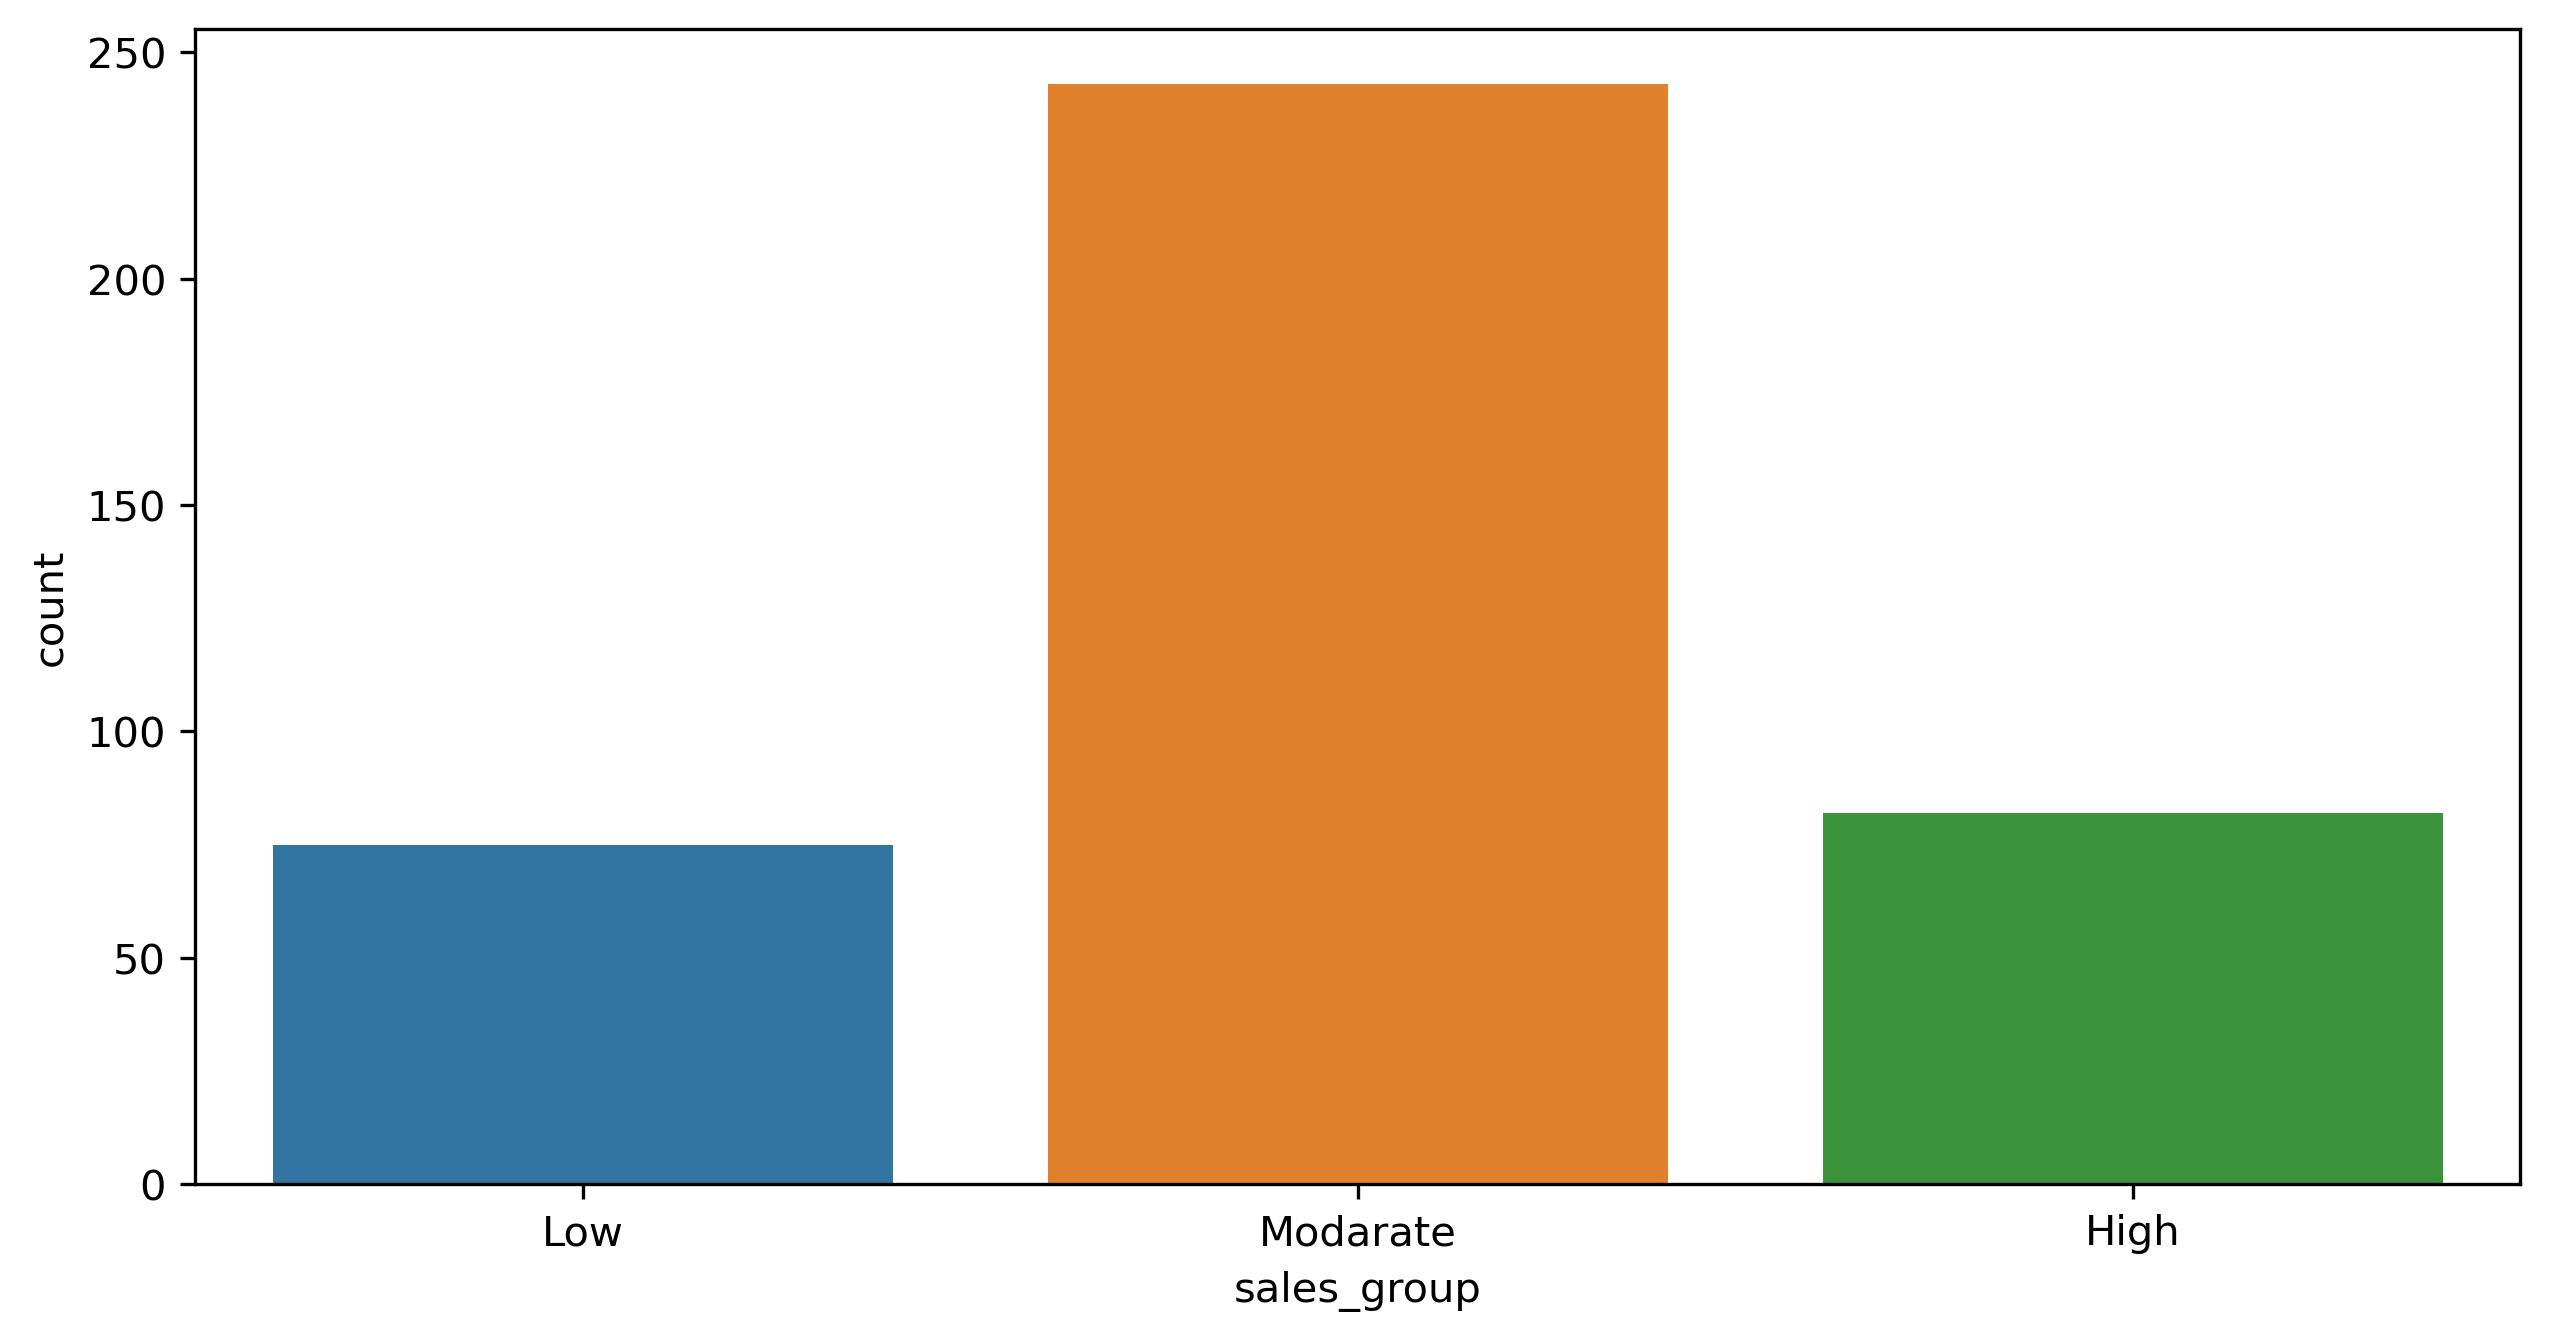

In [56]:
sns.countplot(df['sales_group'])

##### Checking relationship of categorical columns

<AxesSubplot:xlabel='Urban', ylabel='count'>

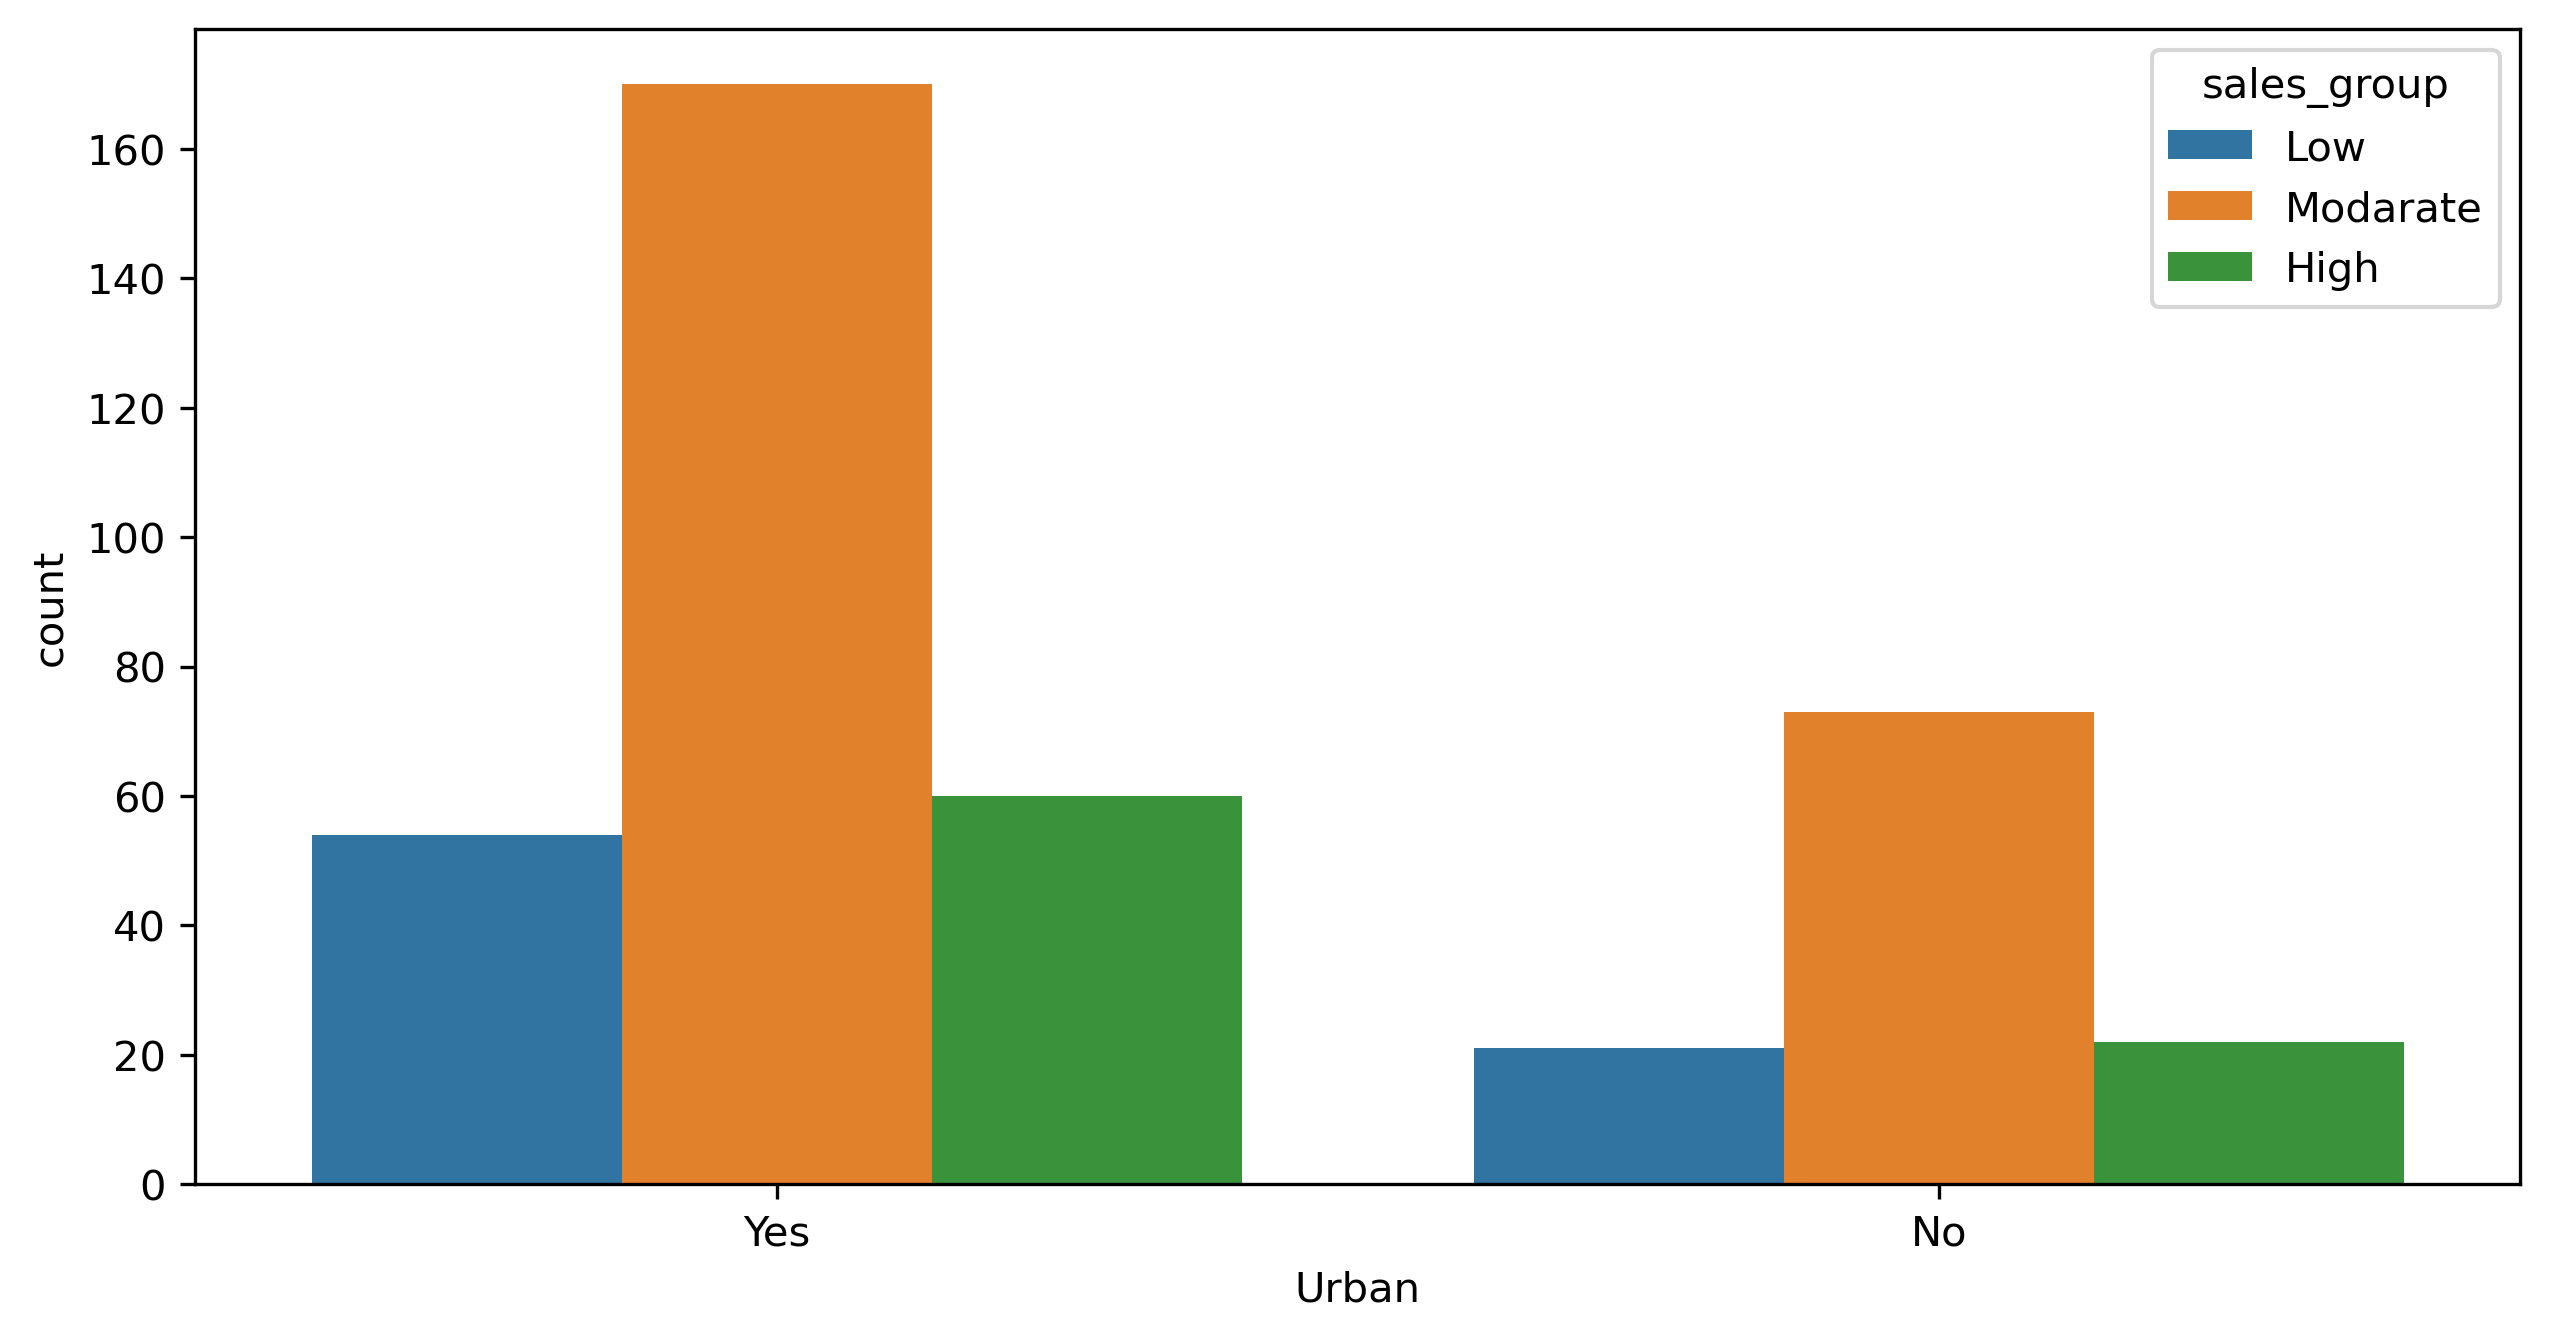

In [58]:
sns.countplot(df['Urban'],hue=df['sales_group'])

<AxesSubplot:xlabel='ShelveLoc', ylabel='count'>

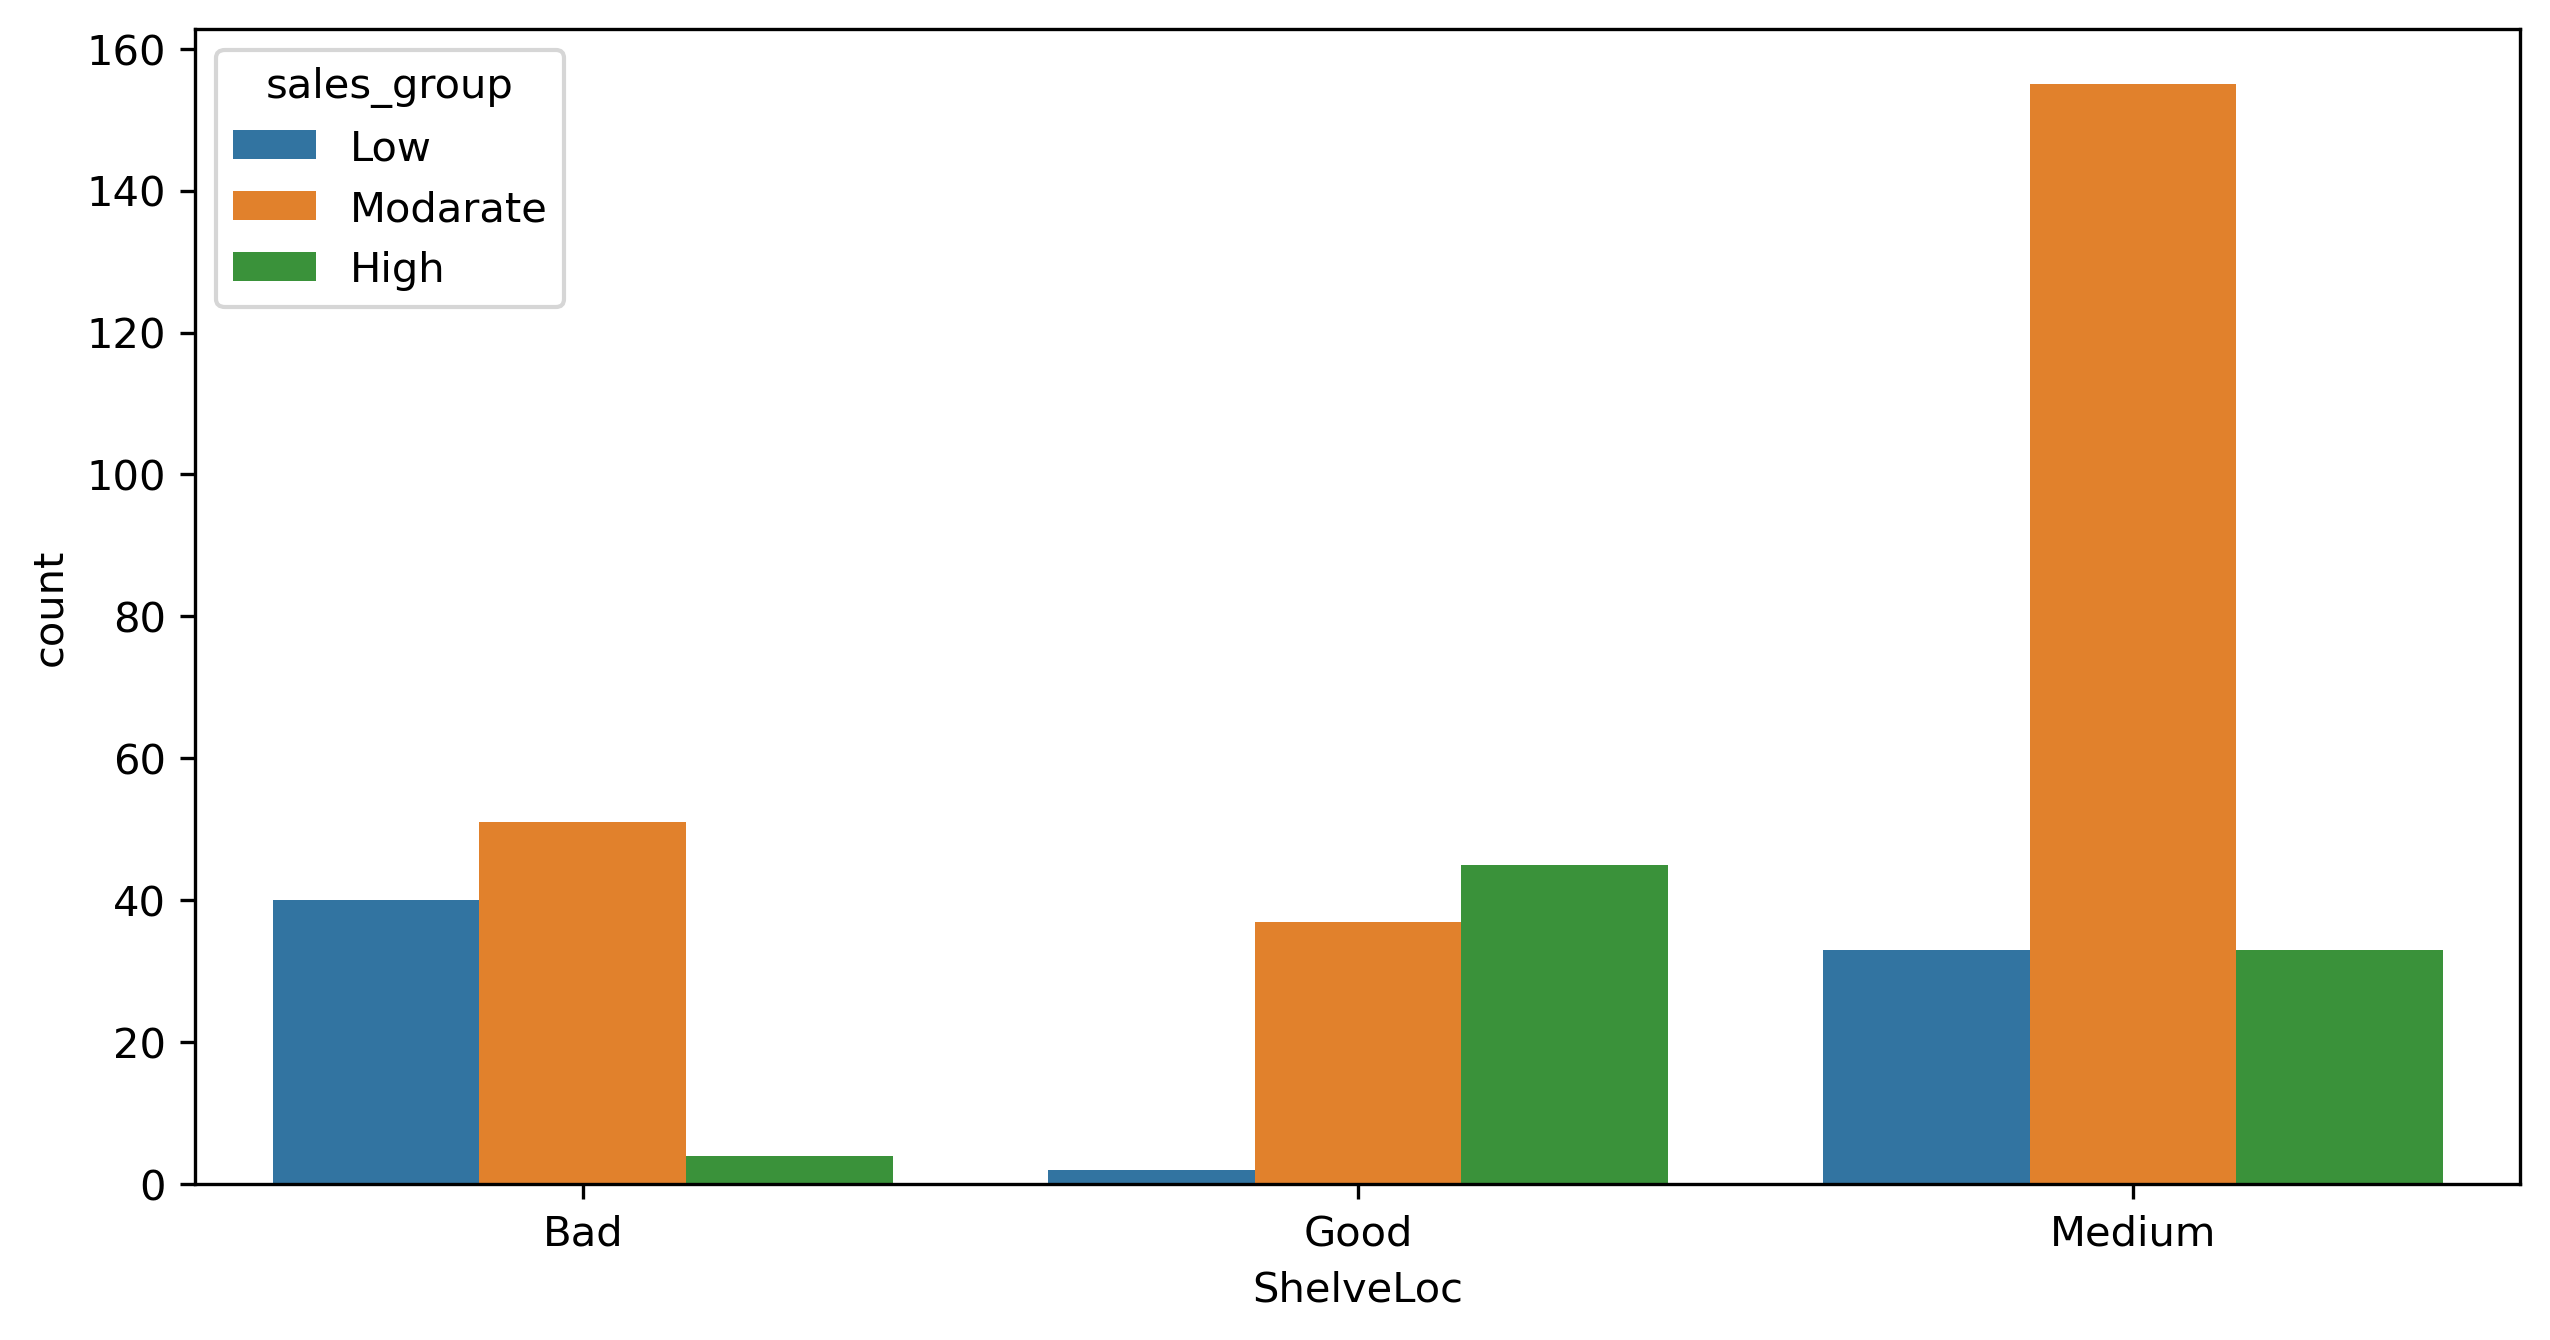

In [59]:
sns.countplot(df['ShelveLoc'],hue=df['sales_group'])

<AxesSubplot:xlabel='US', ylabel='count'>

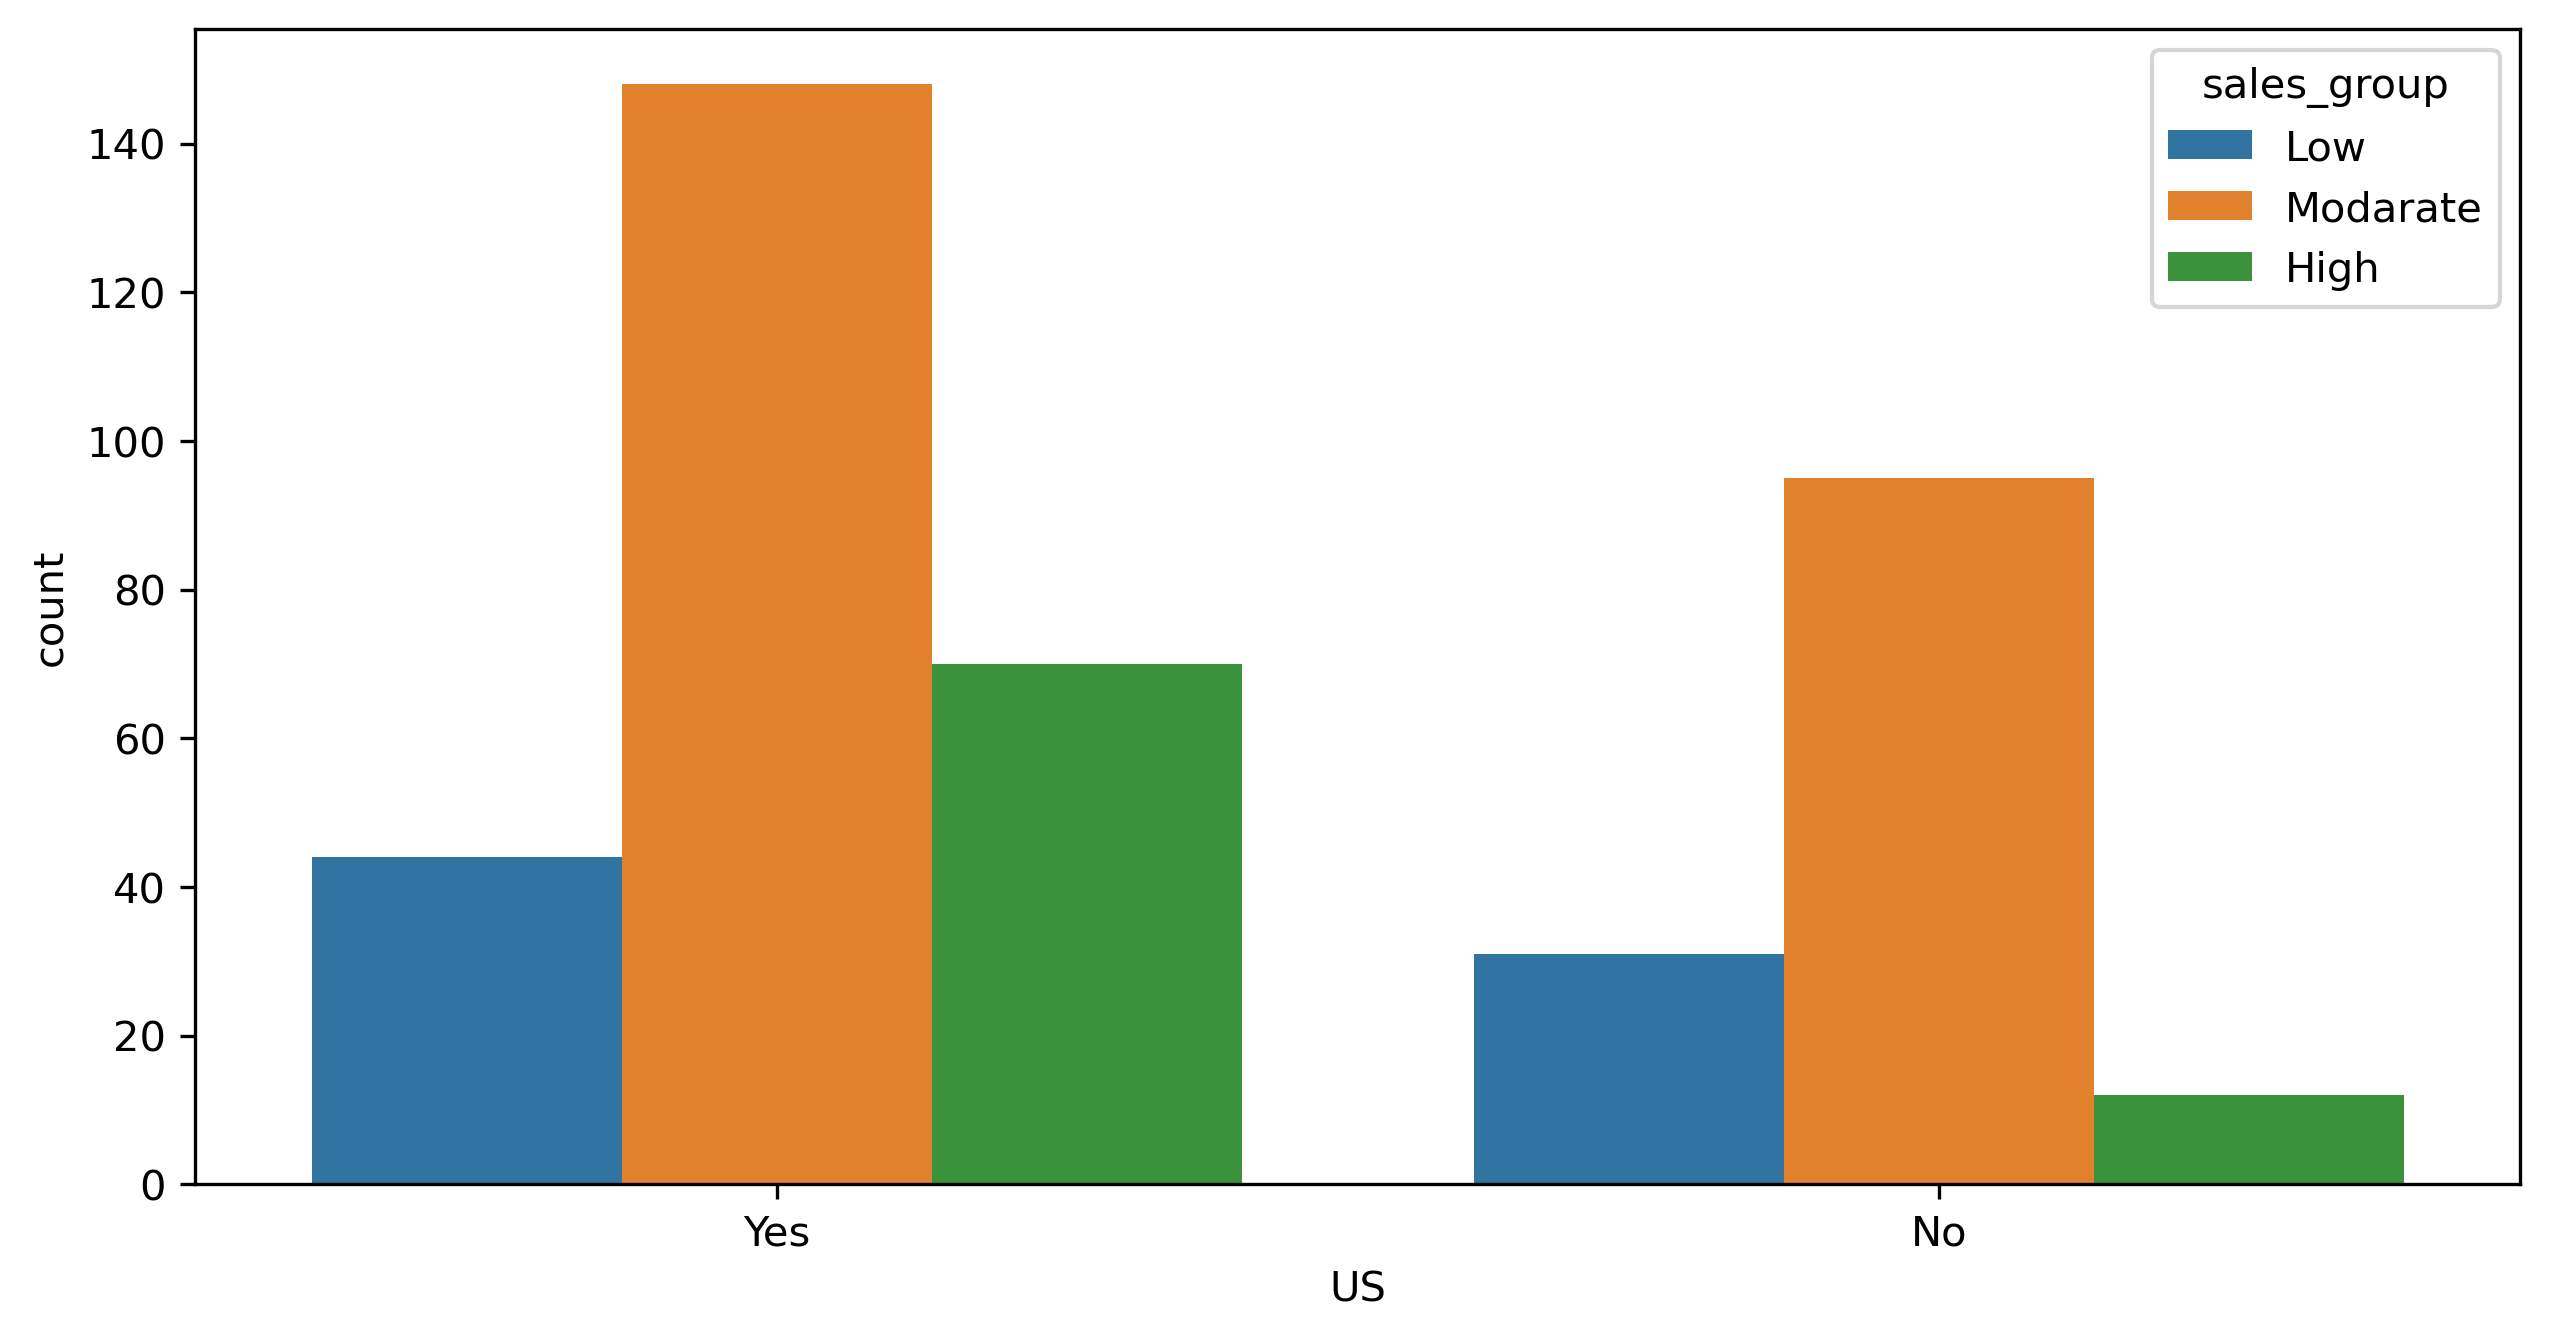

In [60]:
sns.countplot(df['US'],hue=df['sales_group'])

# Encoding

In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
le=LabelEncoder()
df['ShelveLoc']=le.fit_transform(df['ShelveLoc'])

In [64]:
df['Urban']=le.fit_transform(df['Urban'])

In [65]:
df['US']=le.fit_transform(df['US'])

In [66]:
df['sales_group']=le.fit_transform(df['sales_group'])

In [67]:
df

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  \
0     9.50      138.0    73.0         11.0       276.0  120.0          0   
1    11.22      111.0    48.0         16.0       260.0   83.0          1   
2    10.06      113.0    35.0         10.0       269.0   80.0          2   
3     7.40      117.0   100.0          4.0       466.0   97.0          2   
4     4.15      141.0    64.0          3.0       340.0  128.0          0   
..     ...        ...     ...          ...         ...    ...        ...   
395  12.57      138.0   108.0         17.0       203.0  128.0          1   
396   6.14      139.0    23.0          3.0        37.0  120.0          2   
397   7.41      162.0    26.0         12.0       368.0  159.0          2   
398   5.94      100.0    79.0          7.0       284.0   95.0          0   
399   9.71      134.0    37.0          0.0        27.0  120.0          1   

      Age  Education  Urban  US  sales_group  
0    42.0       17.0      1   1            2  
1    65.0       10.0      1   1            0  
2    59.0       12.0      1   1            0  
3    55.0       14.0      1   1            2  
4    38.0       13.0      1   0            1  
..    ...        ...    ...  ..          ...  
395  33.0       14.0      1   1            0  
396  55.0       11.0      0   1            2  
397  40.0       18.0      1   1            2  
398  50.0       12.0      1   1            2  
399  49.0       16.0      1   1            2  

[400 rows x 12 columns]

# Model Building

In [69]:
x=df.iloc[:,1:-1]
y=df.iloc[:,-1]

In [70]:
x

CompPrice  Income  Advertising  Population  Price  ShelveLoc   Age  \
0        138.0    73.0         11.0       276.0  120.0          0  42.0   
1        111.0    48.0         16.0       260.0   83.0          1  65.0   
2        113.0    35.0         10.0       269.0   80.0          2  59.0   
3        117.0   100.0          4.0       466.0   97.0          2  55.0   
4        141.0    64.0          3.0       340.0  128.0          0  38.0   
..         ...     ...          ...         ...    ...        ...   ...   
395      138.0   108.0         17.0       203.0  128.0          1  33.0   
396      139.0    23.0          3.0        37.0  120.0          2  55.0   
397      162.0    26.0         12.0       368.0  159.0          2  40.0   
398      100.0    79.0          7.0       284.0   95.0          0  50.0   
399      134.0    37.0          0.0        27.0  120.0          1  49.0   

     Education  Urban  US  
0         17.0      1   1  
1         10.0      1   1  
2         12.0      1   1  
3         14.0      1   1  
4         13.0      1   0  
..         ...    ...  ..  
395       14.0      1   1  
396       11.0      0   1  
397       18.0      1   1  
398       12.0      1   1  
399       16.0      1   1  

[400 rows x 10 columns]

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
xtrain, xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
rfc=RandomForestClassifier()
rfc.fit(xtrain,ytrain)
ypred=rfc.predict(xtest)
ypred

In [74]:
from sklearn.metrics import classification_report

In [75]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.75      0.43      0.55        14
           1       0.57      0.25      0.35        16
           2       0.69      0.90      0.78        50

    accuracy                           0.69        80
   macro avg       0.67      0.53      0.56        80
weighted avg       0.68      0.69      0.65        80



In [76]:
rfc.score(xtrain,ytrain),rfc.score(xtest,ytest)

(1.0, 0.6875)

# Hyperparameter tuninig

In [77]:
from sklearn.model_selection import GridSearchCV

In [98]:
params={'criterion':["gini", "entropy"],
       'max_depth':[2,3,4,5,6],       
       'min_samples_split':[1,2,3,4,6,7],
       'max_features':["auto", "sqrt", "log2"],
       'min_samples_leaf':[1,2,3,4,5,6]}

In [99]:
grid=GridSearchCV(RandomForestClassifier(),param_grid=params,verbose=2)

In [100]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.1s

[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_sam

[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_sam

[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_sam

[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_sam

[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_sam

[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_sam

[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_sam

[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_sam

[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_sam

[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_sam

[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_sam

[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_sam

[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_sam

[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_sam

[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_sam

[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_sam

[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_sam

[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_sam

[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_sam

[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_sam

[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_sam

[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_sam

[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_sam

[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_sam

[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_sam

[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_sam

[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_sam

[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_sam

[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_sam

[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_sam

[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_sam

[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_sam

[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_sam

[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_sam

[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=6, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=6, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=6, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=6, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=6, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=6, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=6, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=6, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_sam

[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_sam

[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_sam

[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=2,

[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=6; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=6; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=6; total time=   0.1s
[CV] END criterion=entropy, max_depth=2,

[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=7; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=7; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=7; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=7; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=7; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=2,

[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=2,

[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=2,

[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=6; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=7; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=7; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=7; total time=   0.1s
[CV] END criterion=entropy, max_depth=2,

[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=2,

[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=2,

[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=6; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=6; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=6; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=6; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=7; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=7; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=7; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=7; total time=   0.1s
[CV] END criterion=entropy, max_depth=3,

[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=3,

[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=3,

[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=6; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=6; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=6; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=6; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=7; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=7; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=7; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=7; total time=   0.1s
[CV] END criterion=entropy, max_depth=3,

[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=3,

[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=3,

[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=6; total time=   0.3s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=6; total time=   0.3s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=7; total time=   0.3s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=7; total time=   0.4s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=7; total time=   0.4s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=7; total time=   0.3s
[CV] END criterion=entropy, max_depth=3,

[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=3,

[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=4,

[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=7; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=7; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=7; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=7; total time=   0.1s
[CV] END criterion=entropy, max_depth=4,

[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=4,

[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=4,

[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=6; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=6; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=6; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=6; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=6; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=7; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=7; total time=   0.1s
[CV] END criterion=entropy, max_depth=4,

[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=4,

[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=4,

[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=6; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=6; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=6; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=7; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=7; total time=   0.1s
[CV] END criterion=entropy, max_depth=4,

[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=5,

[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=5,

[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6; total time=   0.1s
[CV] END criterion=entropy, max_depth=5,

[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=7; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=7; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=7; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=7; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=5,

[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=5,

[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6; total time=   0.1s
[CV] END criterion=entropy, max_depth=5,

[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=6; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=7; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=5,

[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.3s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=6,

[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=6,

[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=7; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=7; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=7; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=7; total time=   0.1s
[CV] END criterion=entropy, max_depth=6,

[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=6,

[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=6,

[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=6, min_samples_split=6; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=6, min_samples_split=6; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=6, min_samples_split=6; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=6, min_samples_split=6; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=6, min_samples_split=7; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=6, min_samples_split=7; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=6, min_samples_split=7; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=6, min_samples_split=7; total time=   0.1s
[CV] END criterion=entropy, max_depth=6,

[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=6,

[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=6,

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [1, 2, 3, 4, 6, 7]},
             verbose=2)

In [101]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4}

# Final Model

In [102]:
rfc=RandomForestClassifier(criterion="entropy",max_depth=6,max_features="sqrt",min_samples_leaf=1,min_samples_split=4)
rfc.fit(xtrain,ytrain)
ypred=rfc.predict(xtest)
ypred

array([2, 0, 1, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2])

In [103]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.67      0.29      0.40        14
           1       0.50      0.25      0.33        16
           2       0.67      0.88      0.76        50

    accuracy                           0.65        80
   macro avg       0.61      0.47      0.50        80
weighted avg       0.63      0.65      0.61        80



In [104]:
print('Training Accuracy:',rfc.score(xtrain,ytrain))
print('Testing Accuracy:',rfc.score(xtest,ytest))

Training Accuracy: 0.915625
Testing Accuracy: 0.65
